In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gdp-data-for-indian-states/NAD-Meghalaya-GSVA_cur_2016-17.csv
/kaggle/input/gdp-data-for-indian-states/NAD-Mizoram-GSVA_cur_2014-15.csv
/kaggle/input/gdp-data-for-indian-states/NAD-Tamil_Nadu-GSVA_cur_2016-17.csv
/kaggle/input/gdp-data-for-indian-states/NAD-Haryana-GSVA_cur_2016-17.csv
/kaggle/input/gdp-data-for-indian-states/NAD-Karnataka-GSVA_cur_2015-16.csv
/kaggle/input/gdp-data-for-indian-states/GSDP.csv
/kaggle/input/gdp-data-for-indian-states/NAD-Telangana-GSVA_cur_2016-17.csv
/kaggle/input/gdp-data-for-indian-states/NAD-Gujarat-GSVA_cur_2015-16.csv
/kaggle/input/gdp-data-for-indian-states/droupout rate.csv
/kaggle/input/gdp-data-for-indian-states/NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv
/kaggle/input/gdp-data-for-indian-states/NAD-Punjab-GSVA_cur_2014-15.csv
/kaggle/input/gdp-data-for-indian-states/NAD-Nagaland-GSVA_cur_2014-15.csv
/kaggle/input/gdp-data-for-indian-states/NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv
/kaggle/input/gdp-data-for-indian-states/NAD-Trip

GDP Analysis of Indian States

Understanding GDP

Gross domestic product (GDP) at current prices is the GDP at the market value of goods and services produced in a country during a year. In other words, GDP measures the 'monetary value of final goods and services produced by a country/state in a given period of time'.

GDP can be broadly divided into goods and services produced by three sectors: the primary sector (agriculture), the secondary sector (industry), and the tertiary sector (services).

It is also known as nominal GDP. More technically, (real) GDP takes into account the price change that may have occurred due to inflation. This means that the real GDP is nominal GDP adjusted for inflation. We will use the nominal GDP for this exercise. Also, we will consider the financial year 2015-16 as the base year, as most of the data required for this exercise is available for the aforementioned period.

Per Capita GDP and Income

Total GDP divided by the population gives the per capita GDP, which roughly measures the average value of goods and services produced per person. The per capita income is closely related to the per capita GDP (though they are not the same). In general, the per capita income increases when the per capita GDP increases, and vice-versa. For instance, in the financial year 2015-16, the per capita income of India was ₹93,293, whereas the per capita GDP of India was $1717, which roughly amounts to ₹1,11,605.

Data

The data is sourced from https://data.gov.in/, an Open Government Data (OGD) platform of India. The data for GDP analysis of the Indian states is divided into two parts:

Data I-A: This dataset consists of the GSDP (Gross State Domestic Product) data for the states and union territories.

Data I-B: This dataset contains the distribution of GSDP among three sectors: the primary sector (agriculture), the secondary sector (industry) and the tertiary sector (services) along with taxes and subsidies. There is separate dataset for each of the states.

There are two parts to this project. In the first part, we analyse and compare the GDPs of various Indian states (both total and per capita). The GDP of a state is referred to as the GSDP (Gross State Domestic Product). Then, we divide the states into four categories based on the GDP per capita, and for each of these four categories, analyse the sectors that contribute the most to the GDP (such as agriculture, real estate, manufacturing, etc.).

In the second part, we analyse whether GDP per capita is related to dropout rates in schools and colleges.

Note: We filtered out the union territories (Delhi, Chandigarh, Andaman and Nicobar Islands, etc.) for further analysis, as they are governed directly by the centre, not state governments.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Part-I: GDP Analysis of the Indian States**

In [15]:
#reading the data 
data1 = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/GSDP.csv')
data1.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [16]:
# Basic info regarding the data
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Items  Description         11 non-null     object 
 1   Duration                   11 non-null     object 
 2   Andhra Pradesh             11 non-null     float64
 3   Arunachal Pradesh          9 non-null      float64
 4   Assam                      9 non-null      float64
 5   Bihar                      9 non-null      float64
 6   Chhattisgarh               11 non-null     float64
 7   Goa                        9 non-null      float64
 8   Gujarat                    9 non-null      float64
 9   Haryana                    11 non-null     float64
 10  Himachal Pradesh           7 non-null      float64
 11  Jammu & Kashmir            9 non-null      float64
 12  Jharkhand                  9 non-null      float64
 13  Karnataka                  9 non-null      float64
 

In [17]:
# Observe the various columns in the dataset
data1.columns

Index(['Items  Description', 'Duration', 'Andhra Pradesh ',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal1', 'Andaman & Nicobar Islands',
       'Chandigarh', 'Delhi', 'Puducherry', 'All_India GDP'],
      dtype='object')

In [18]:
# Check the total number of null values in each columns
data1.isnull().sum()

Items  Description            0
Duration                      0
Andhra Pradesh                0
Arunachal Pradesh             2
Assam                         2
Bihar                         2
Chhattisgarh                  0
Goa                           2
Gujarat                       2
Haryana                       0
Himachal Pradesh              4
Jammu & Kashmir               2
Jharkhand                     2
Karnataka                     2
Kerala                        2
Madhya Pradesh                0
Maharashtra                   4
Manipur                       4
Meghalaya                     0
Mizoram                       4
Nagaland                      4
Odisha                        0
Punjab                        4
Rajasthan                     4
Sikkim                        2
Tamil Nadu                    0
Telangana                     0
Tripura                       4
Uttar Pradesh                 2
Uttarakhand                   2
West Bengal1                 11
Andaman 

In [19]:
# Check if any column has all the values as NAN
data1.isnull().all(axis=0)

Items  Description           False
Duration                     False
Andhra Pradesh               False
Arunachal Pradesh            False
Assam                        False
Bihar                        False
Chhattisgarh                 False
Goa                          False
Gujarat                      False
Haryana                      False
Himachal Pradesh             False
Jammu & Kashmir              False
Jharkhand                    False
Karnataka                    False
Kerala                       False
Madhya Pradesh               False
Maharashtra                  False
Manipur                      False
Meghalaya                    False
Mizoram                      False
Nagaland                     False
Odisha                       False
Punjab                       False
Rajasthan                    False
Sikkim                       False
Tamil Nadu                   False
Telangana                    False
Tripura                      False
Uttar Pradesh       

In [20]:
# removing West Bengal as the whole column is NAN
data1 = data1.drop('West Bengal1', axis = 1)

In [22]:
data1

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,751485.00,359433.00,19208.00,724049.00,115523.00,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,855481.00,401493.00,21663.00,822903.00,131835.00,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,971090.00,452186.00,25593.00,944146.00,149817.00,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,1092564.00,511178.00,29667.00,1043371.00,161985.00,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,1212668.00,575631.00,NaN,1153795.00,184091.00,NaN,30304.00,551963.00,26533.00,13675331.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,13.84,11.70,12.78,13.65,14.12,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


Calculating the average growth of states for the duration 2013-14, 2014-15 and 2015-16 by taking the mean of the row '(% Growth over previous year)'.

In [23]:
data1.iloc[6:].isnull().sum()
 # since there are at max. only 1 missing value we can take the average of the other two numbers

Items  Description           0
Duration                     0
Andhra Pradesh               0
Arunachal Pradesh            0
Assam                        0
Bihar                        0
Chhattisgarh                 0
Goa                          0
Gujarat                      0
Haryana                      0
Himachal Pradesh             1
Jammu & Kashmir              0
Jharkhand                    0
Karnataka                    0
Kerala                       0
Madhya Pradesh               0
Maharashtra                  1
Manipur                      1
Meghalaya                    0
Mizoram                      1
Nagaland                     1
Odisha                       0
Punjab                       1
Rajasthan                    1
Sikkim                       0
Tamil Nadu                   0
Telangana                    0
Tripura                      1
Uttar Pradesh                0
Uttarakhand                  0
Andaman & Nicobar Islands    1
Chandigarh                   0
Delhi   

In [26]:
avg_growth = data1.iloc[6:]
#avg_growth is dataframe to find average growth of state 

In [27]:
avg_growth

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,13.51,12.63,18.14,14.73,13.64,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,12.51,13.05,15.92,10.51,8.12,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,10.99,12.61,NaN,10.58,13.65,NaN,8.84,12.09,10.15,9.99


In [28]:
avg_growth.columns

Index(['Items  Description', 'Duration', 'Andhra Pradesh ',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'Andaman & Nicobar Islands', 'Chandigarh', 'Delhi',
       'Puducherry', 'All_India GDP'],
      dtype='object')

In [29]:
# Taking only the values for the states
average_growth_values = avg_growth[avg_growth.columns[2:34]].mean() 

In [30]:
# Sorting the average growth rate values and then making a dataframe for all the states
average_growth_values = average_growth_values.sort_values()
average_growth_rate = average_growth_values.to_frame(name='Average growth rate')
average_growth_rate

,Average growth rate
Goa,6.033333
Meghalaya,6.953333
Odisha,9.836667
Sikkim,10.486667
Jammu & Kashmir,10.900000
Gujarat,11.126667
Punjab,11.185000
Maharashtra,11.260000
Rajasthan,11.320000
Jharkhand,11.500000


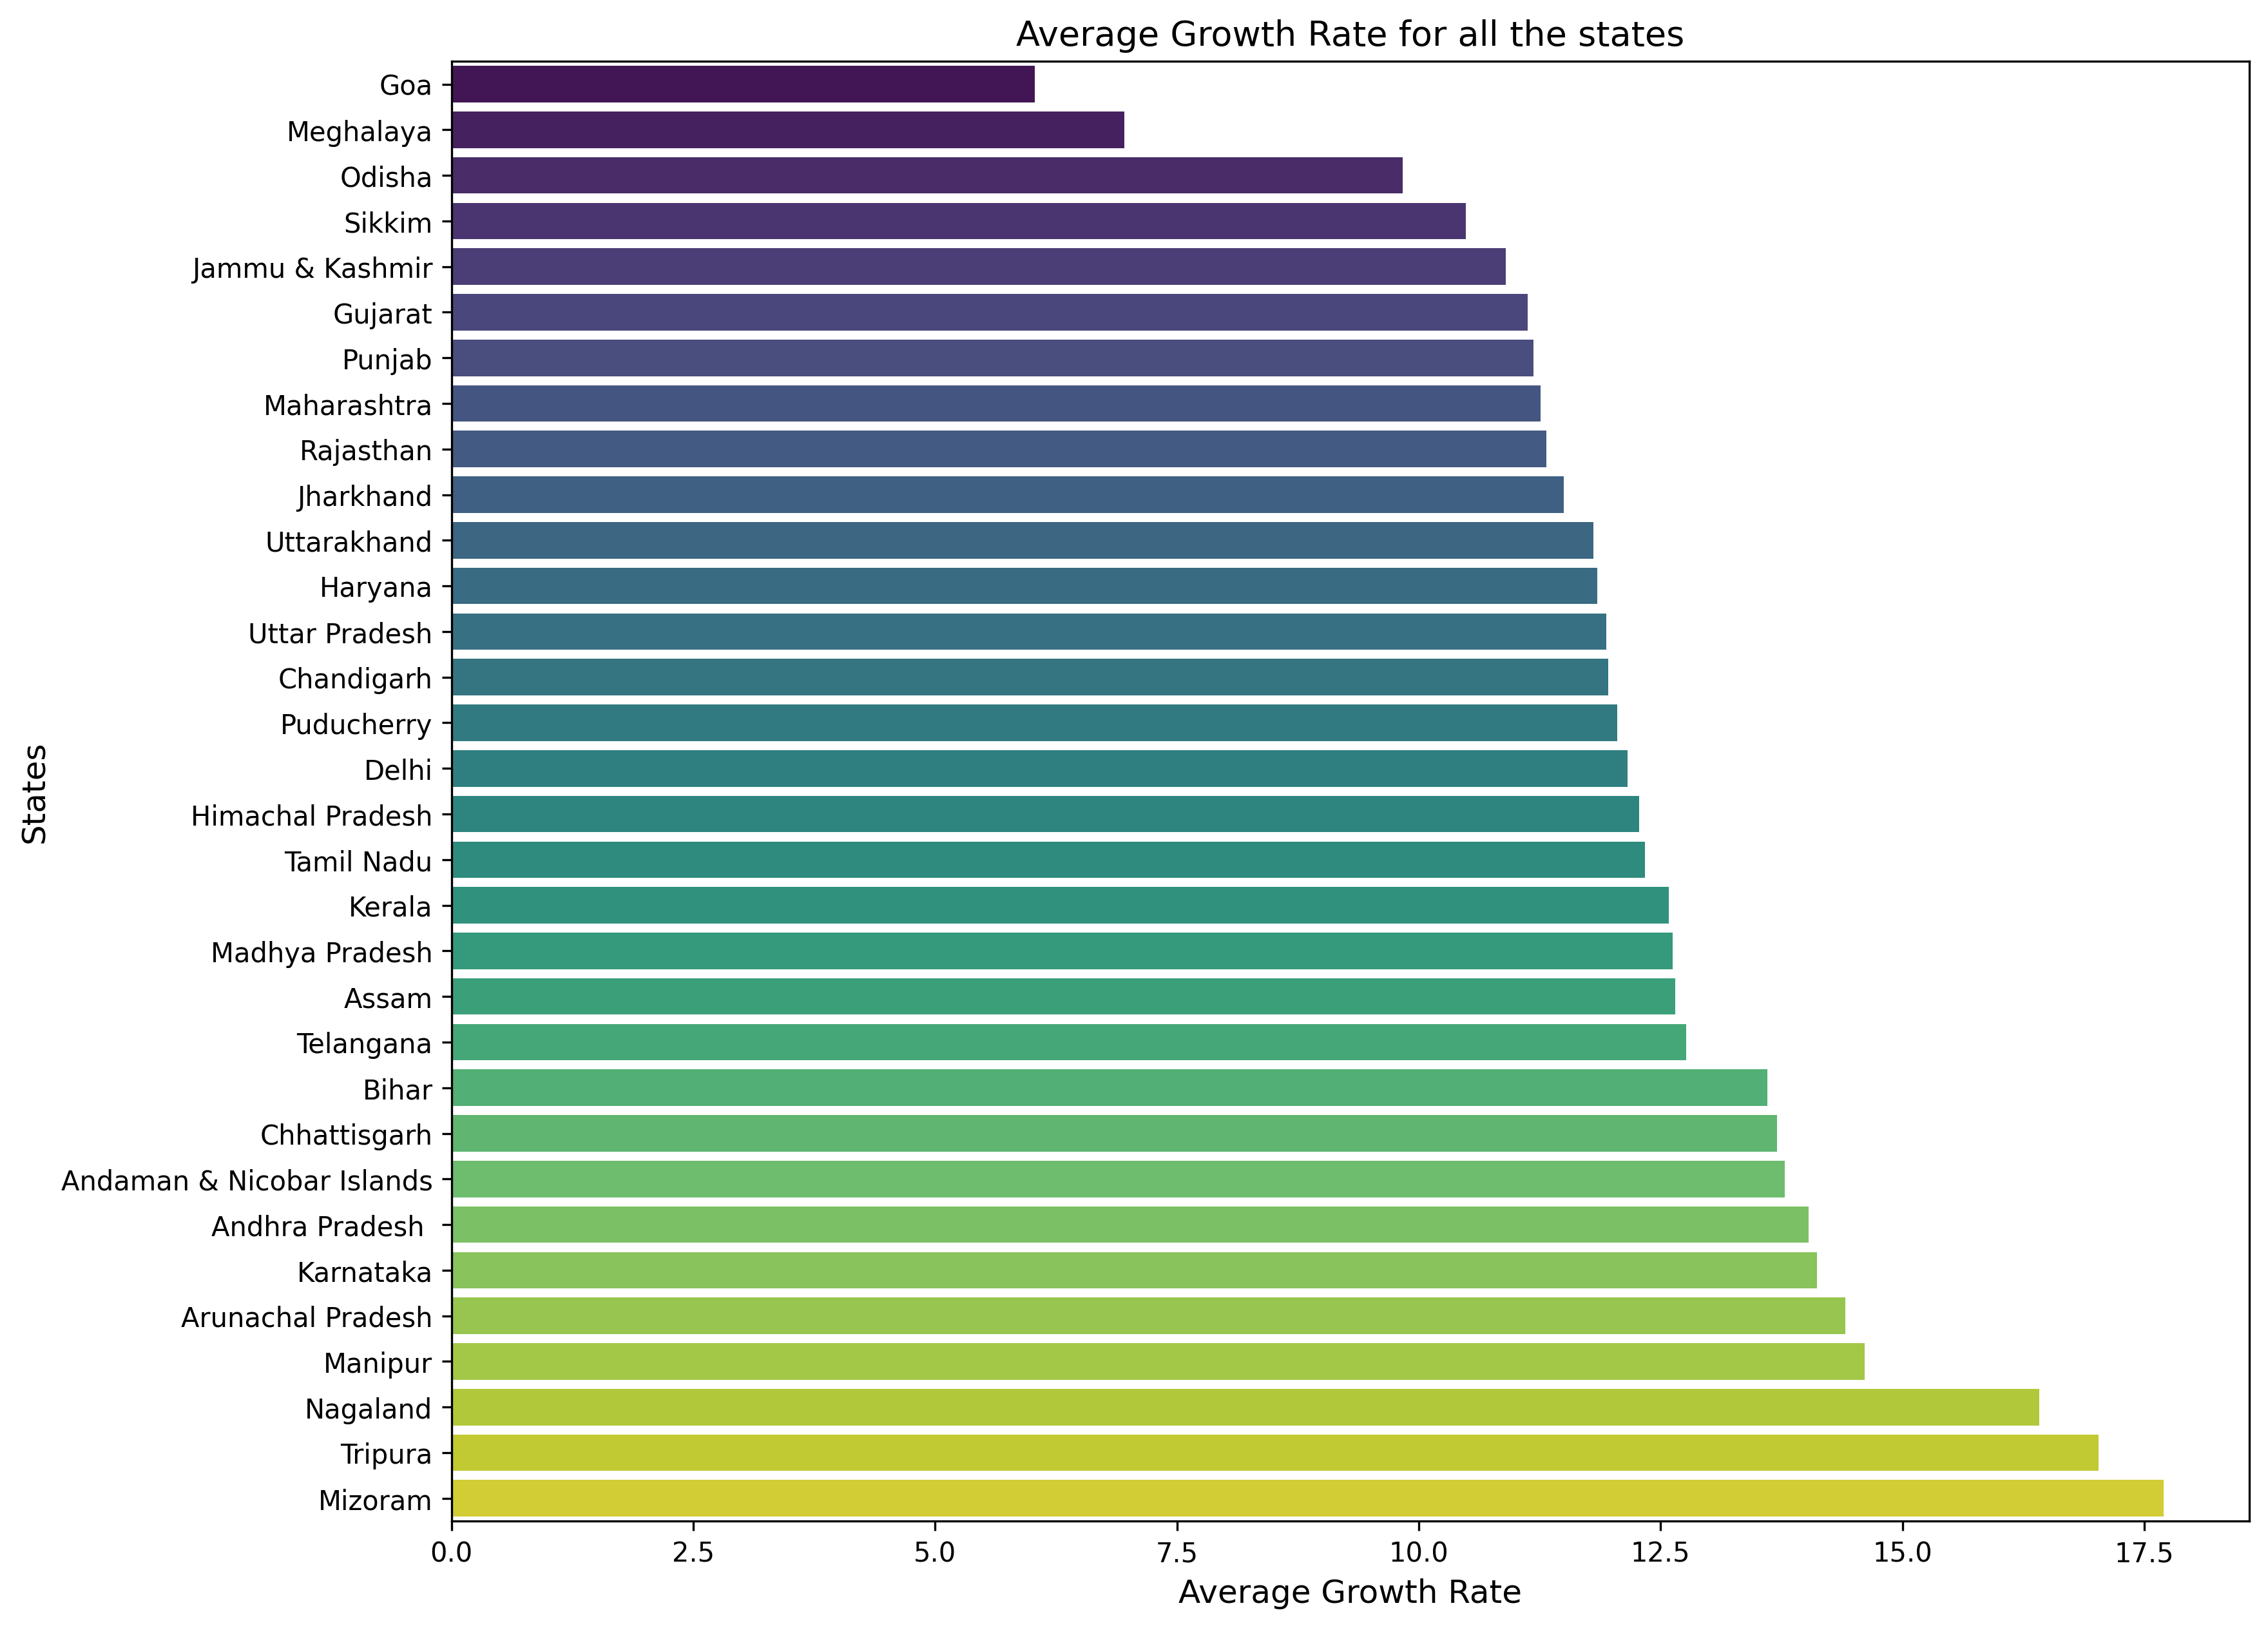

In [31]:
# plotting the average growth rate for all the states
plt.figure(figsize=(12,10), dpi = 300)

sns.barplot(x = average_growth_rate['Average growth rate'], y = average_growth_values.index,palette='viridis')
plt.xlabel('Average Growth Rate', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.title('Average Growth Rate for all the states',fontsize=13)
plt.show()

We can see an interesting observation from the above plot, the average growth rate has been the maximum for the North East states except for Assam and Meghalaya which is not what we generally expect so we should take a further look at these states.

The average growth rate has been least for states like Goa, Odisha, Meghalaya, Sikkim, Jammu & Kashmir etc.

In [32]:
# top 5 states as per average growth rate

average_growth_rate['Average growth rate'][-5:]

Arunachal Pradesh    14.413333
Manipur              14.610000
Nagaland             16.415000
Tripura              17.030000
Mizoram              17.700000
Name: Average growth rate, dtype: float64

In [33]:
# top 5 states as per average growth rate for the years 2013-14, 2014-15, 2015-16

avg_growth[['Mizoram','Tripura','Nagaland','Manipur','Arunachal Pradesh']]

,Mizoram,Tripura,Nagaland,Manipur,Arunachal Pradesh
7,23.1,18.14,21.98,17.83,16.38
8,12.3,15.92,10.85,11.39,14.79
9,NaN,NaN,NaN,NaN,12.07


**We can see that the growth rate for the above states actually decreased substantially for the year 14-15 in comparison to the year 13-14 but as the growth rate was very high for the year 13-14 so the average is higher for these states.
In the absence of data for the year 2015-16 we cannot say definitivily that these are high performing states as their growth rate decreased for the year 2014-15**

**To find out the states that have been growing continuously fast we need to take a look at the Standard Deviation and the Mean growth rate for the states.**

In [34]:
#create a dataframe to store the mean and the standard deviation of the growth rate for various states

describe = pd.DataFrame(avg_growth.describe())
describe = describe.T
describe

,count,mean,std,min,25%,50%,75%,max
Andhra Pradesh,3.0,14.033333,1.597133,12.85,13.1250,13.400,14.6250,15.85
Arunachal Pradesh,3.0,14.413333,2.179549,12.07,13.4300,14.790,15.5850,16.38
Assam,3.0,12.650000,1.040961,11.45,12.3200,13.190,13.2500,13.31
Bihar,3.0,13.603333,3.834871,10.59,11.4450,12.300,15.1100,17.92
Chhattisgarh,3.0,13.703333,2.730024,10.98,12.3350,13.690,15.0650,16.44
Goa,3.0,6.033333,10.290444,-5.77,2.4900,10.750,11.9350,13.12
Gujarat,3.0,11.126667,0.326548,10.82,10.9550,11.090,11.2800,11.47
Haryana,3.0,11.846667,3.238245,9.18,10.0450,10.910,13.1800,15.45
Himachal Pradesh,2.0,12.280000,3.026417,10.14,11.2100,12.280,13.3500,14.42
Jammu & Kashmir,3.0,10.900000,6.642146,4.70,7.3950,10.090,14.0000,17.91


In [35]:
# states having mean growth rate greater than 12 and standard deviation less than 2

describe[(describe['mean']>12) & (describe['std']<2)]

,count,mean,std,min,25%,50%,75%,max
Andhra Pradesh,3.0,14.033333,1.597133,12.85,13.125,13.40,14.625,15.85
Assam,3.0,12.650000,1.040961,11.45,12.320,13.19,13.250,13.31
Kerala,3.0,12.583333,0.654930,11.85,12.320,12.79,12.950,13.11
Tamil Nadu,3.0,12.336667,1.268910,10.99,11.750,12.51,13.010,13.51
Telangana,3.0,12.763333,0.248462,12.61,12.620,12.63,12.840,13.05
Tripura,2.0,17.030000,1.569777,15.92,16.475,17.03,17.585,18.14
Delhi,3.0,12.160000,1.236487,10.96,11.525,12.09,12.760,13.43


In [36]:
# states having mean growth rate greater than 13 and standard deviation greater than 2

describe[(describe['mean']<12) & (describe['std']>2)]

,count,mean,std,min,25%,50%,75%,max
Goa,3.0,6.033333,10.290444,-5.77,2.490,10.75,11.935,13.12
Haryana,3.0,11.846667,3.238245,9.18,10.045,10.91,13.180,15.45
Jammu & Kashmir,3.0,10.900000,6.642146,4.70,7.395,10.09,14.000,17.91
Jharkhand,3.0,11.500000,3.610374,7.92,9.680,11.44,13.290,15.14
Maharashtra,2.0,11.260000,3.507250,8.78,10.020,11.26,12.500,13.74
Meghalaya,3.0,6.953333,2.401548,4.87,5.640,6.41,7.995,9.58
Odisha,3.0,9.836667,3.411412,6.19,8.280,10.37,11.660,12.95
Uttar Pradesh,3.0,11.940000,2.416464,10.51,10.545,10.58,12.655,14.73
Uttarakhand,3.0,11.803333,3.189864,8.12,10.880,13.64,13.645,13.65
Chandigarh,3.0,11.960000,2.952440,8.84,10.585,12.33,13.520,14.71


**By comparing the average growth rate for the year 2013-14, 2014-15, 2015-16 and the standard deviation.
States that are growing consistently fast are:

Andhra Pradesh
Assam
Kerala
Tamil Nadu
Telangana

States that are struggling are as follows:

Goa
Meghalaya
Odisha
Jammu & Kashmir
Jharkhand

Plotting the total GDP of the states for the year 2015-16:
Identifying the top 5 and the bottom 5 states based on total GDP.**

In [37]:
data1.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,751485.0,359433.0,19208.0,724049.0,115523.0,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,855481.0,401493.0,21663.0,822903.0,131835.0,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,971090.0,452186.0,25593.0,944146.0,149817.0,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,1092564.0,511178.0,29667.0,1043371.0,161985.0,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,30304.0,551963.0,26533.0,13675331.0


In [38]:
# filtering out the data for the year 2015-16 and storing it in a dataframe
total_GDP_15_16 = data1[(data1['Items  Description'] == 'GSDP - CURRENT PRICES (` in Crore)') & (data1['Duration'] == '2015-16')]
total_GDP_15_16

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,1212668.0,575631.0,NaN,1153795.0,184091.0,NaN,30304.0,551963.0,26533.0,13675331.0


In [39]:
# carrying out necessary transformation to make the data ready for plotting

total_GDP_15_16_states = total_GDP_15_16[total_GDP_15_16.columns[2:34]].transpose()
total_GDP_15_16_states = total_GDP_15_16_states.rename(columns={4: 'Total GDP of States 2015-16'})
total_GDP_15_16_states = total_GDP_15_16_states.dropna()
total_GDP_15_16_states = total_GDP_15_16_states.sort_values('Total GDP of States 2015-16',ascending=True)
total_GDP_15_16_states

,Total GDP of States 2015-16
Sikkim,16637.0
Arunachal Pradesh,18784.0
Puducherry,26533.0
Meghalaya,26745.0
Chandigarh,30304.0
Goa,45002.0
Jammu & Kashmir,118387.0
Uttarakhand,184091.0
Assam,224234.0
Jharkhand,241955.0


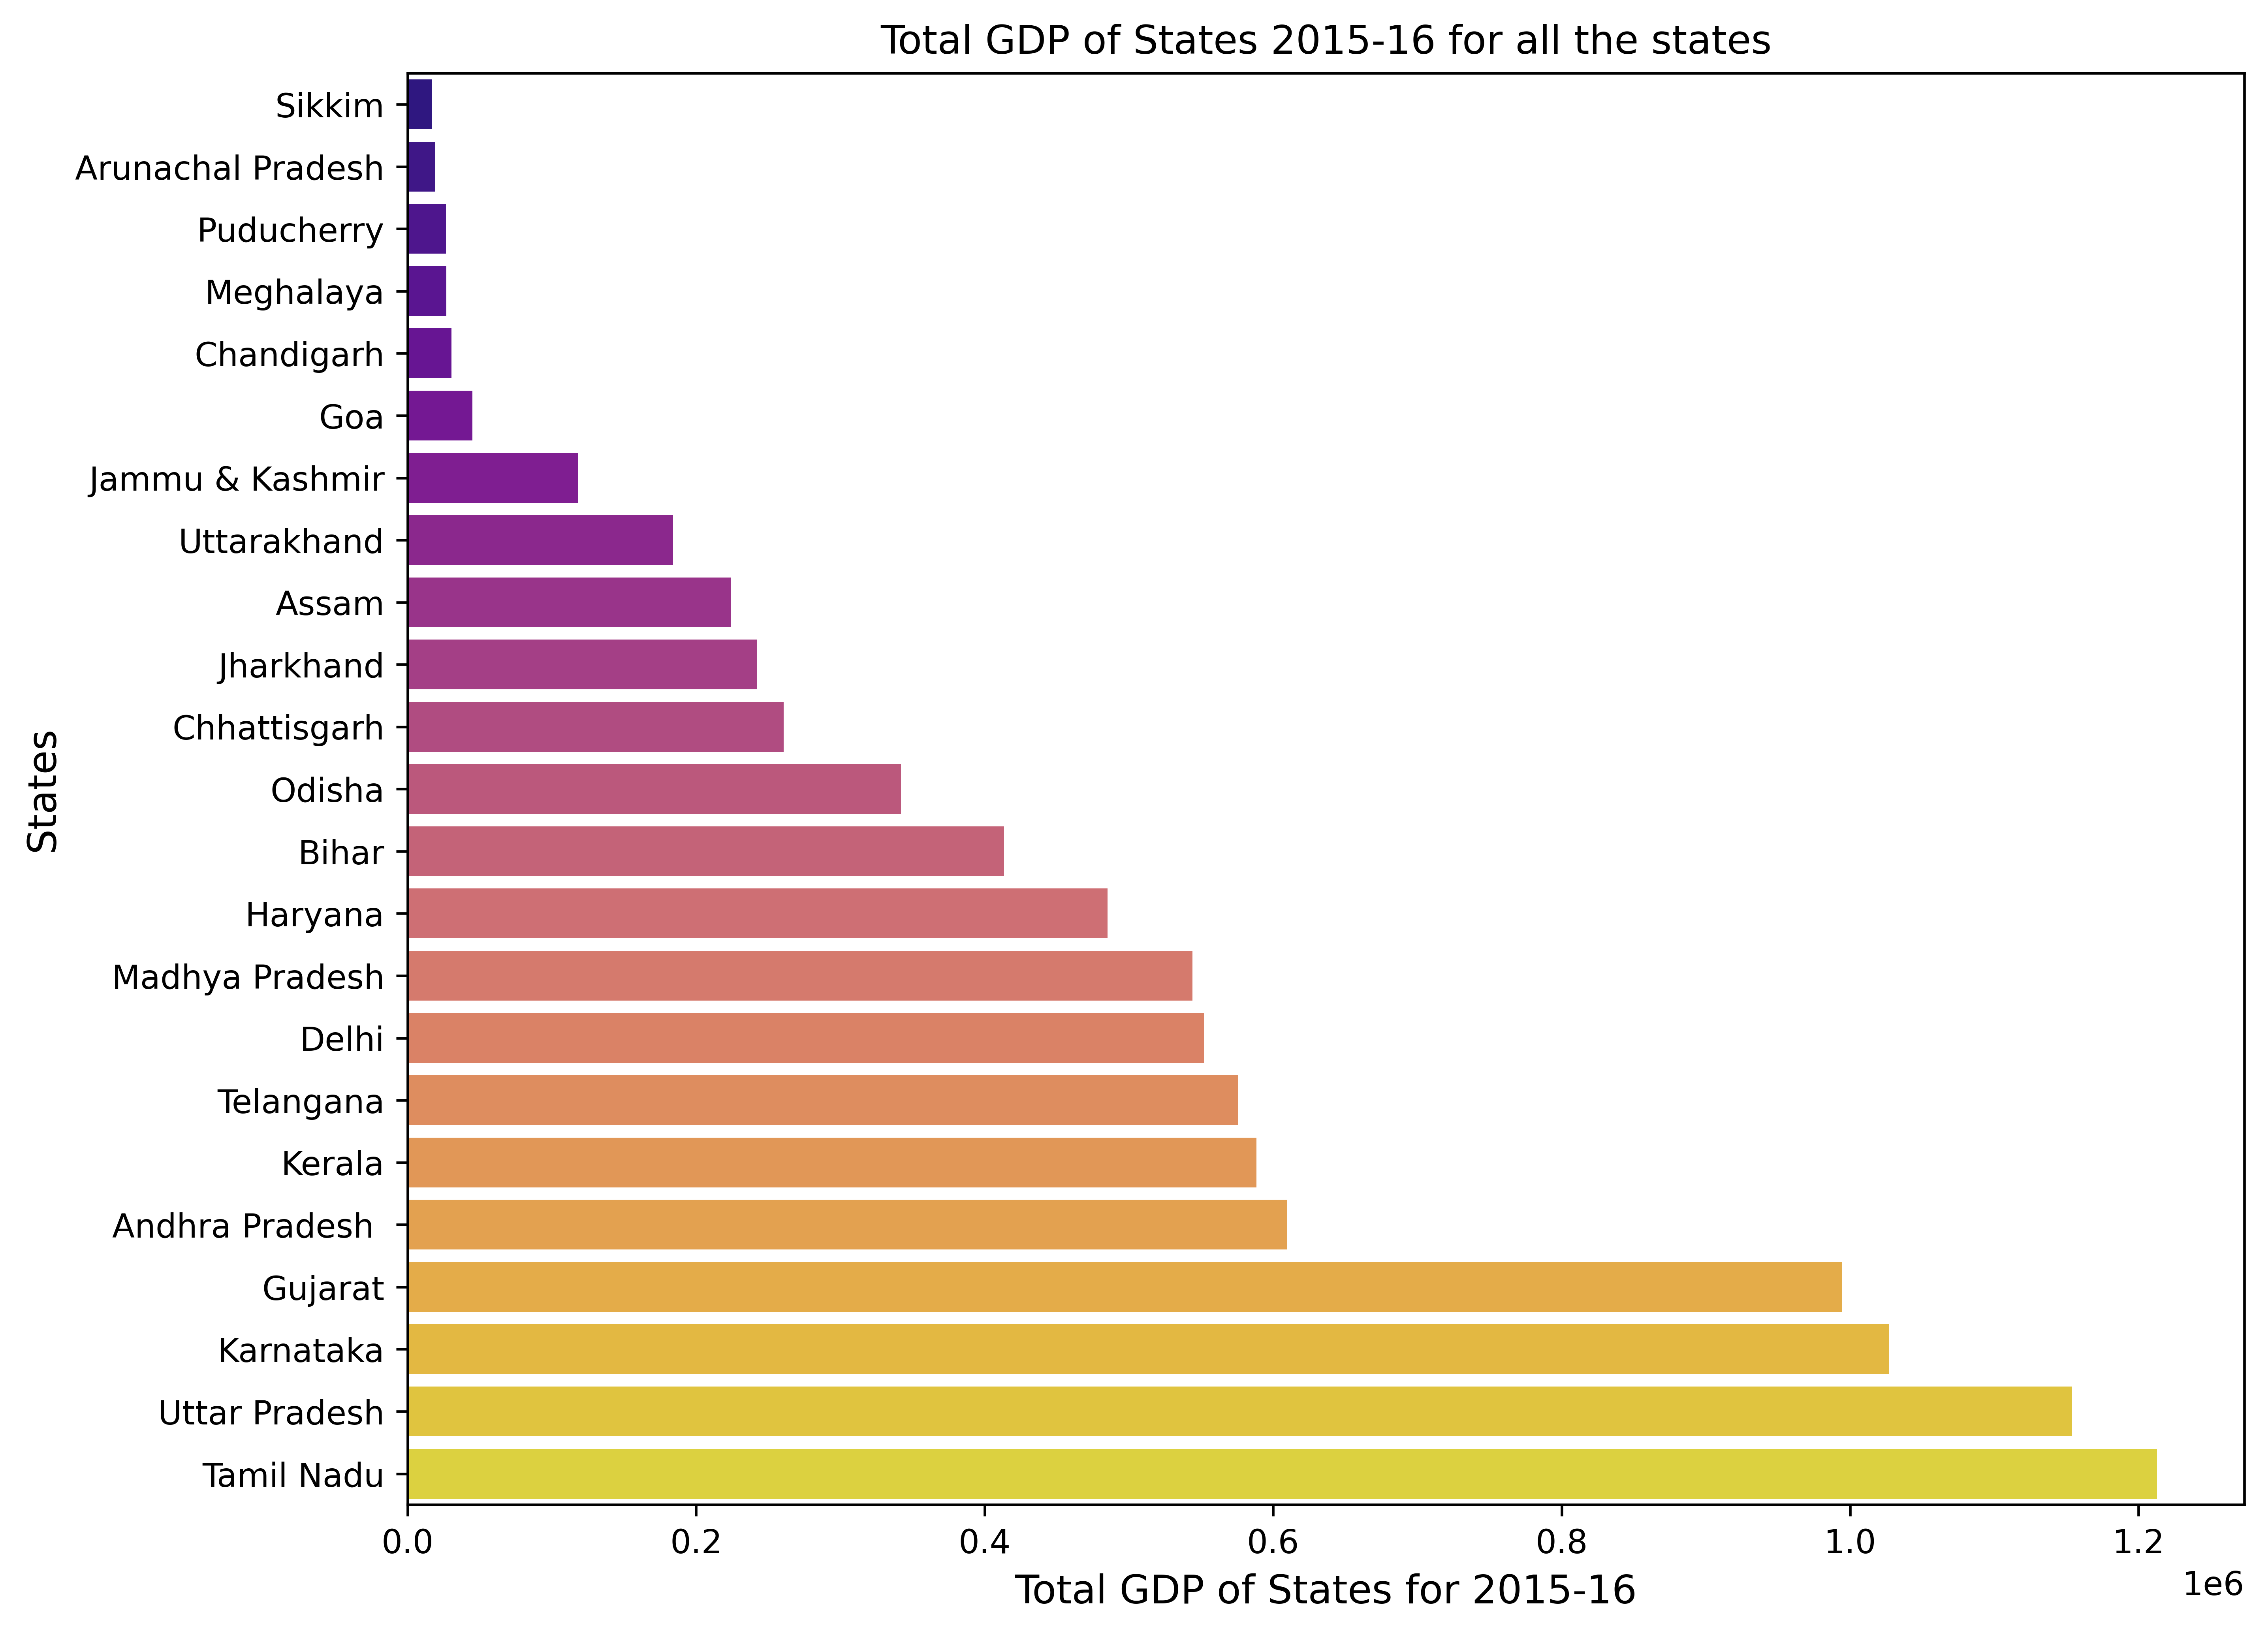

In [40]:
plt.figure(figsize=(10,8), dpi = 600)

sns.barplot(x = total_GDP_15_16_states['Total GDP of States 2015-16'], y = total_GDP_15_16_states.index,palette='plasma')
plt.xlabel('Total GDP of States for 2015-16', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.title('Total GDP of States 2015-16 for all the states',fontsize=12)
plt.show()

**Top 5 states in terms of total GDP for the year 2015-16**

In [41]:
top_5_eco = total_GDP_15_16_states[-5:]
top_5_eco

,Total GDP of States 2015-16
Andhra Pradesh,609934.0
Gujarat,994316.0
Karnataka,1027068.0
Uttar Pradesh,1153795.0
Tamil Nadu,1212668.0


**Bottom 5 states in terms of total GDP for the year 2015-16**

In [42]:
bottom_5_eco = total_GDP_15_16_states[:5]
bottom_5_eco

,Total GDP of States 2015-16
Sikkim,16637.0
Arunachal Pradesh,18784.0
Puducherry,26533.0
Meghalaya,26745.0
Chandigarh,30304.0


**Reading the CSV files for all the states**

In [44]:
Andhra_Pradesh = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Andhra_Pradesh-GSVA_cur_2016-17.csv')

In [46]:
Arunachal_Pradesh = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Arunachal_Pradesh-GSVA_cur_2015-16.csv')

In [49]:
Assam = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Assam-GSVA_cur_2015-16.csv')

In [50]:
Bihar = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Bihar-GSVA_cur_2015-16.csv')

In [51]:
Chhattisgarh = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Chhattisgarh-GSVA_cur_2016-17.csv')

In [53]:
Goa = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Goa-GSVA_cur_2015-16.csv')

In [59]:
Gujarat = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Gujarat-GSVA_cur_2015-16.csv')

In [57]:
Haryana = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Haryana-GSVA_cur_2016-17.csv')

In [56]:
Himachal_Pradesh = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Himachal_Pradesh-GSVA_cur_2014-15.csv')

In [54]:
Jharkhand = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Jharkhand-GSVA_cur_2015-16.csv')

In [60]:
Karnataka = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Karnataka-GSVA_cur_2015-16.csv')

In [61]:
Kerala = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Kerala-GSVA_cur_2015-16.csv')

In [63]:
Madhya_Pradesh = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Madhya_Pradesh-GSVA_cur_2016-17.csv')

In [64]:
Maharashtra = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Maharashtra-GSVA_cur_2014-15.csv')

In [66]:
Manipur = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Manipur-GSVA_cur_2014-15.csv')

In [67]:
Meghalaya = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Meghalaya-GSVA_cur_2016-17.csv')

In [68]:
Mizoram = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Mizoram-GSVA_cur_2014-15.csv')

In [79]:
Nagaland = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Nagaland-GSVA_cur_2014-15.csv')

In [78]:
Odisha = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Odisha-GSVA_cur_2016-17.csv')

In [77]:
Punjab = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Punjab-GSVA_cur_2014-15.csv')

In [76]:
Rajasthan = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Rajasthan-GSVA_cur_2014-15.csv')

In [75]:
Sikkim = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Sikkim-GSVA_cur_2015-16.csv')

In [72]:
Tamil_Nadu = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Tamil_Nadu-GSVA_cur_2016-17.csv')

In [73]:
Telangana = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Telangana-GSVA_cur_2016-17.csv')

In [74]:
Tripura = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Tripura-GSVA_cur_2014-15.csv')

In [71]:
Uttarakhand = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Uttarakhand-GSVA_cur_2015-16.csv')

In [70]:
Uttar_Pradesh = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/NAD-Uttar_Pradesh-GSVA_cur_2015-16.csv')

**Taking data only for year 2014-15**

In [80]:
andhra_pradesh = Andhra_Pradesh[['S.No.','Item', '2014-15']]
andhra_pradesh = andhra_pradesh.rename(columns={'2014-15': 'Andhra_Pradesh'})

arunachal_pradesh = Arunachal_Pradesh[['S.No.','Item', '2014-15']]
arunachal_pradesh = arunachal_pradesh.rename(columns={'2014-15': 'Arunachal_Pradesh'})

assam = Assam[['S.No.','Item', '2014-15']]
assam = assam.rename(columns={'2014-15': 'Assam'})

bihar = Bihar[['S.No.','Item', '2014-15']]
bihar = bihar.rename(columns={'2014-15': 'Bihar'})

chhattisgarh = Chhattisgarh[['S.No.','Item', '2014-15']]
chhattisgarh = chhattisgarh.rename(columns={'2014-15': 'Chhattisgarh'})

goa = Goa[['S.No.','Item', '2014-15']]
goa = goa.rename(columns={'2014-15': 'Goa'})

gujarat = Gujarat[['S.No.','Item', '2014-15']]
gujarat = gujarat.rename(columns={'2014-15': 'Gujarat'})

haryana = Haryana[['S.No.','Item', '2014-15']]
haryana = haryana.rename(columns={'2014-15': 'Haryana'})

himachal_Pradesh = Himachal_Pradesh[['S.No.','Item', '2014-15']]
himachal_Pradesh = himachal_Pradesh.rename(columns={'2014-15': 'Himachal_Pradesh'})

jharkhand = Jharkhand[['S.No.','Item', '2014-15']]
jharkhand = jharkhand.rename(columns={'2014-15': 'Jharkhand'})

karnataka = Karnataka[['S.No.','Item', '2014-15']]
karnataka = karnataka.rename(columns={'2014-15': 'Karnataka'})

kerala = Kerala[['S.No.','Item', '2014-15']]
kerala = kerala.rename(columns={'2014-15': 'Kerala'})

madhya_pradesh = Madhya_Pradesh[['S.No.','Item', '2014-15']]
madhya_pradesh = madhya_pradesh.rename(columns={'2014-15': 'Madhya_Pradesh'})

maharashtra = Maharashtra[['S.No.','Item', '2014-15']]
maharashtra = maharashtra.rename(columns={'2014-15': 'Maharashtra'})

manipur = Manipur[['S.No.','Item', '2014-15']]
manipur = manipur.rename(columns={'2014-15': 'Manipur'})

meghalaya = Meghalaya[['S.No.','Item', '2014-15']]
meghalaya = meghalaya.rename(columns={'2014-15': 'Meghalaya'})

mizoram = Mizoram[['S.No.','Item', '2014-15']]
mizoram = mizoram.rename(columns={'2014-15': 'Mizoram'})

nagaland = Nagaland[['S.No.','Item', '2014-15']]
nagaland = nagaland.rename(columns={'2014-15': 'Nagaland'})

odisha = Odisha[['S.No.','Item', '2014-15']]
odisha = odisha.rename(columns={'2014-15': 'Odisha'})

punjab = Punjab[['S.No.','Item', '2014-15']]
punjab = punjab.rename(columns={'2014-15': 'Punjab'})

rajasthan = Rajasthan[['S.No.','Item', '2014-15']]
rajasthan = rajasthan.rename(columns={'2014-15': 'Rajasthan'})

sikkim = Sikkim[['S.No.','Item', '2014-15']]
sikkim = sikkim.rename(columns={'2014-15': 'Sikkim'})

tamil_nadu = Tamil_Nadu[['S.No.','Item', '2014-15']]
tamil_nadu = tamil_nadu.rename(columns={'2014-15': 'Tamil_Nadu'})

telangana = Telangana[['S.No.','Item', '2014-15']]
telangana = telangana.rename(columns={'2014-15': 'Telangana'})

tripura = Tripura[['S.No.','Item', '2014-15']]
tripura = tripura.rename(columns={'2014-15': 'Tripura'})

uttar_pradesh = Uttar_Pradesh[['S.No.','Item', '2014-15']]
uttar_pradesh = uttar_pradesh.rename(columns={'2014-15': 'Uttar_Pradesh'})

uttarakhand = Uttarakhand[['S.No.','Item', '2014-15']]
uttarakhand = uttarakhand.rename(columns={'2014-15': 'Uttarakhand'})

In [82]:
# Merging all the tables for different states into a single dataframe

dfs = [andhra_pradesh,arunachal_pradesh, assam, bihar, chhattisgarh, goa, gujarat, haryana,himachal_Pradesh,
       jharkhand, karnataka,kerala,madhya_pradesh, maharashtra,manipur,meghalaya,mizoram, nagaland,odisha,
       punjab,rajasthan,sikkim,tamil_nadu,telangana,tripura,uttarakhand, uttar_pradesh]


from functools import reduce
df_final = reduce(lambda left,right: pd.merge(left,right,how ='left',on=['S.No.', 'Item']), dfs)

In [83]:
df_final.columns

Index(['S.No.', 'Item', 'Andhra_Pradesh', 'Arunachal_Pradesh', 'Assam',
       'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana',
       'Himachal_Pradesh', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil_Nadu',
       'Telangana', 'Tripura', 'Uttarakhand', 'Uttar_Pradesh'],
      dtype='object')

In [84]:
# Renaming some of the state names for merging data at a later stage

df_final = df_final.rename(columns={'Andhra_Pradesh':'Andhra Pradesh', 'Arunachal_Pradesh':'Arunachal Pradesh',
                                   'Himachal_Pradesh':'Himachal Pradesh','Madhya_Pradesh':'Madhya Pradesh',
                                   'Tamil_Nadu':'Tamil Nadu','Uttar_Pradesh':'Uttar Pradesh',
                                   'Chhattisgarh':'Chhatisgarh','Uttarakhand':'Uttrakhand'})

In [85]:
# Final dataframe having the data for all the states for all the sectors and subsectors of the economy

df_final

,S.No.,Item,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhatisgarh,Goa,Gujarat,Haryana,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttrakhand,Uttar Pradesh
0,1,"Agriculture, forestry and fishing",14819416,686117,3855548,7951890,3948847,308507,13769969.00,8015238.0,...,607897,6422978,9285716,15044394,137447,13064238.0,7591501,799825.0,1601423.0,25097754
1,1.1,Crops,7893514,415520,2890544,4688237,2613371,140421,9671086.00,4636731.0,...,375825,4382636,5690972,7673441,114976,7297820.0,4162493,397591.0,866146.0,16215212
2,1.2,Livestock,4309078,38387,173478,2060296,352208,30141,2698910.00,2916173.0,...,123800,788243,2638842,5356257,17338,4693361.0,2951299,88176.0,391188.0,7096876
3,1.3,Forestry and logging,346160,224017,261987,550132,597785,15744,761616.00,352254.0,...,99802,791463,848245,1956660,4529,392705.0,210741,145096.0,339293.0,1404936
4,1.4,Fishing and aquaculture,2270664,8193,529539,653224,385483,122201,638357.00,110080.0,...,8470,460636,107657,58036,604,680352.0,266968,168961.0,4796.0,380730
5,2,Mining and quarrying,1484300,30842,1471149,68107,2451970,3622,2117218.00,25186.0,...,8280,2586328,10354,4069385,1329,265536.0,1541853,142391.0,244549.0,901501
6,Total,Primary,16303716,716959,5326697,8019997,6400817,312129,15887187.00,8040424.0,...,616178,9009306,9296070,19113780,138776,13329774.0,9133354,942216.0,1845972.0,25999255
7,3,Manufacturing,4672266,26120,2002936,2189965,4370593,1177608,24087538.00,7756921.0,...,18346,5754229,4790341,6552580,550697,18914794.0,6353711,228625.0,5866252.0,12261649
8,4,"Electricity, gas, water supply & other utility...",1151729,113527,296587,345168,1198438,204110,3409983.00,1101919.0,...,37944,833067,911611,1122888,212499,1710379.0,716266,77870.0,433880.0,2030625
9,5,Construction,4664889,147842,1733568,3449763,2669855,165819,5526017.00,3702571.0,...,156072,2402396,2202962,5353326,82058,12216718.0,2854024,177899.0,1342733.0,11256450


**Creating the GDP per capita Data Frame**

In [86]:
gdp_per_capita = df_final.iloc[32][2:].sort_values()
gdp_per_capita = gdp_per_capita.to_frame(name = 'GDP per capita')
gdp_per_capita

,GDP per capita
Bihar,33954
Uttar Pradesh,49450
Manipur,58442.0
Assam,60621
Jharkhand,62091
Madhya Pradesh,62989
Odisha,73979
Meghalaya,76228.0
Tripura,77358.0
Rajasthan,84837


**Plotting GDP per capita**

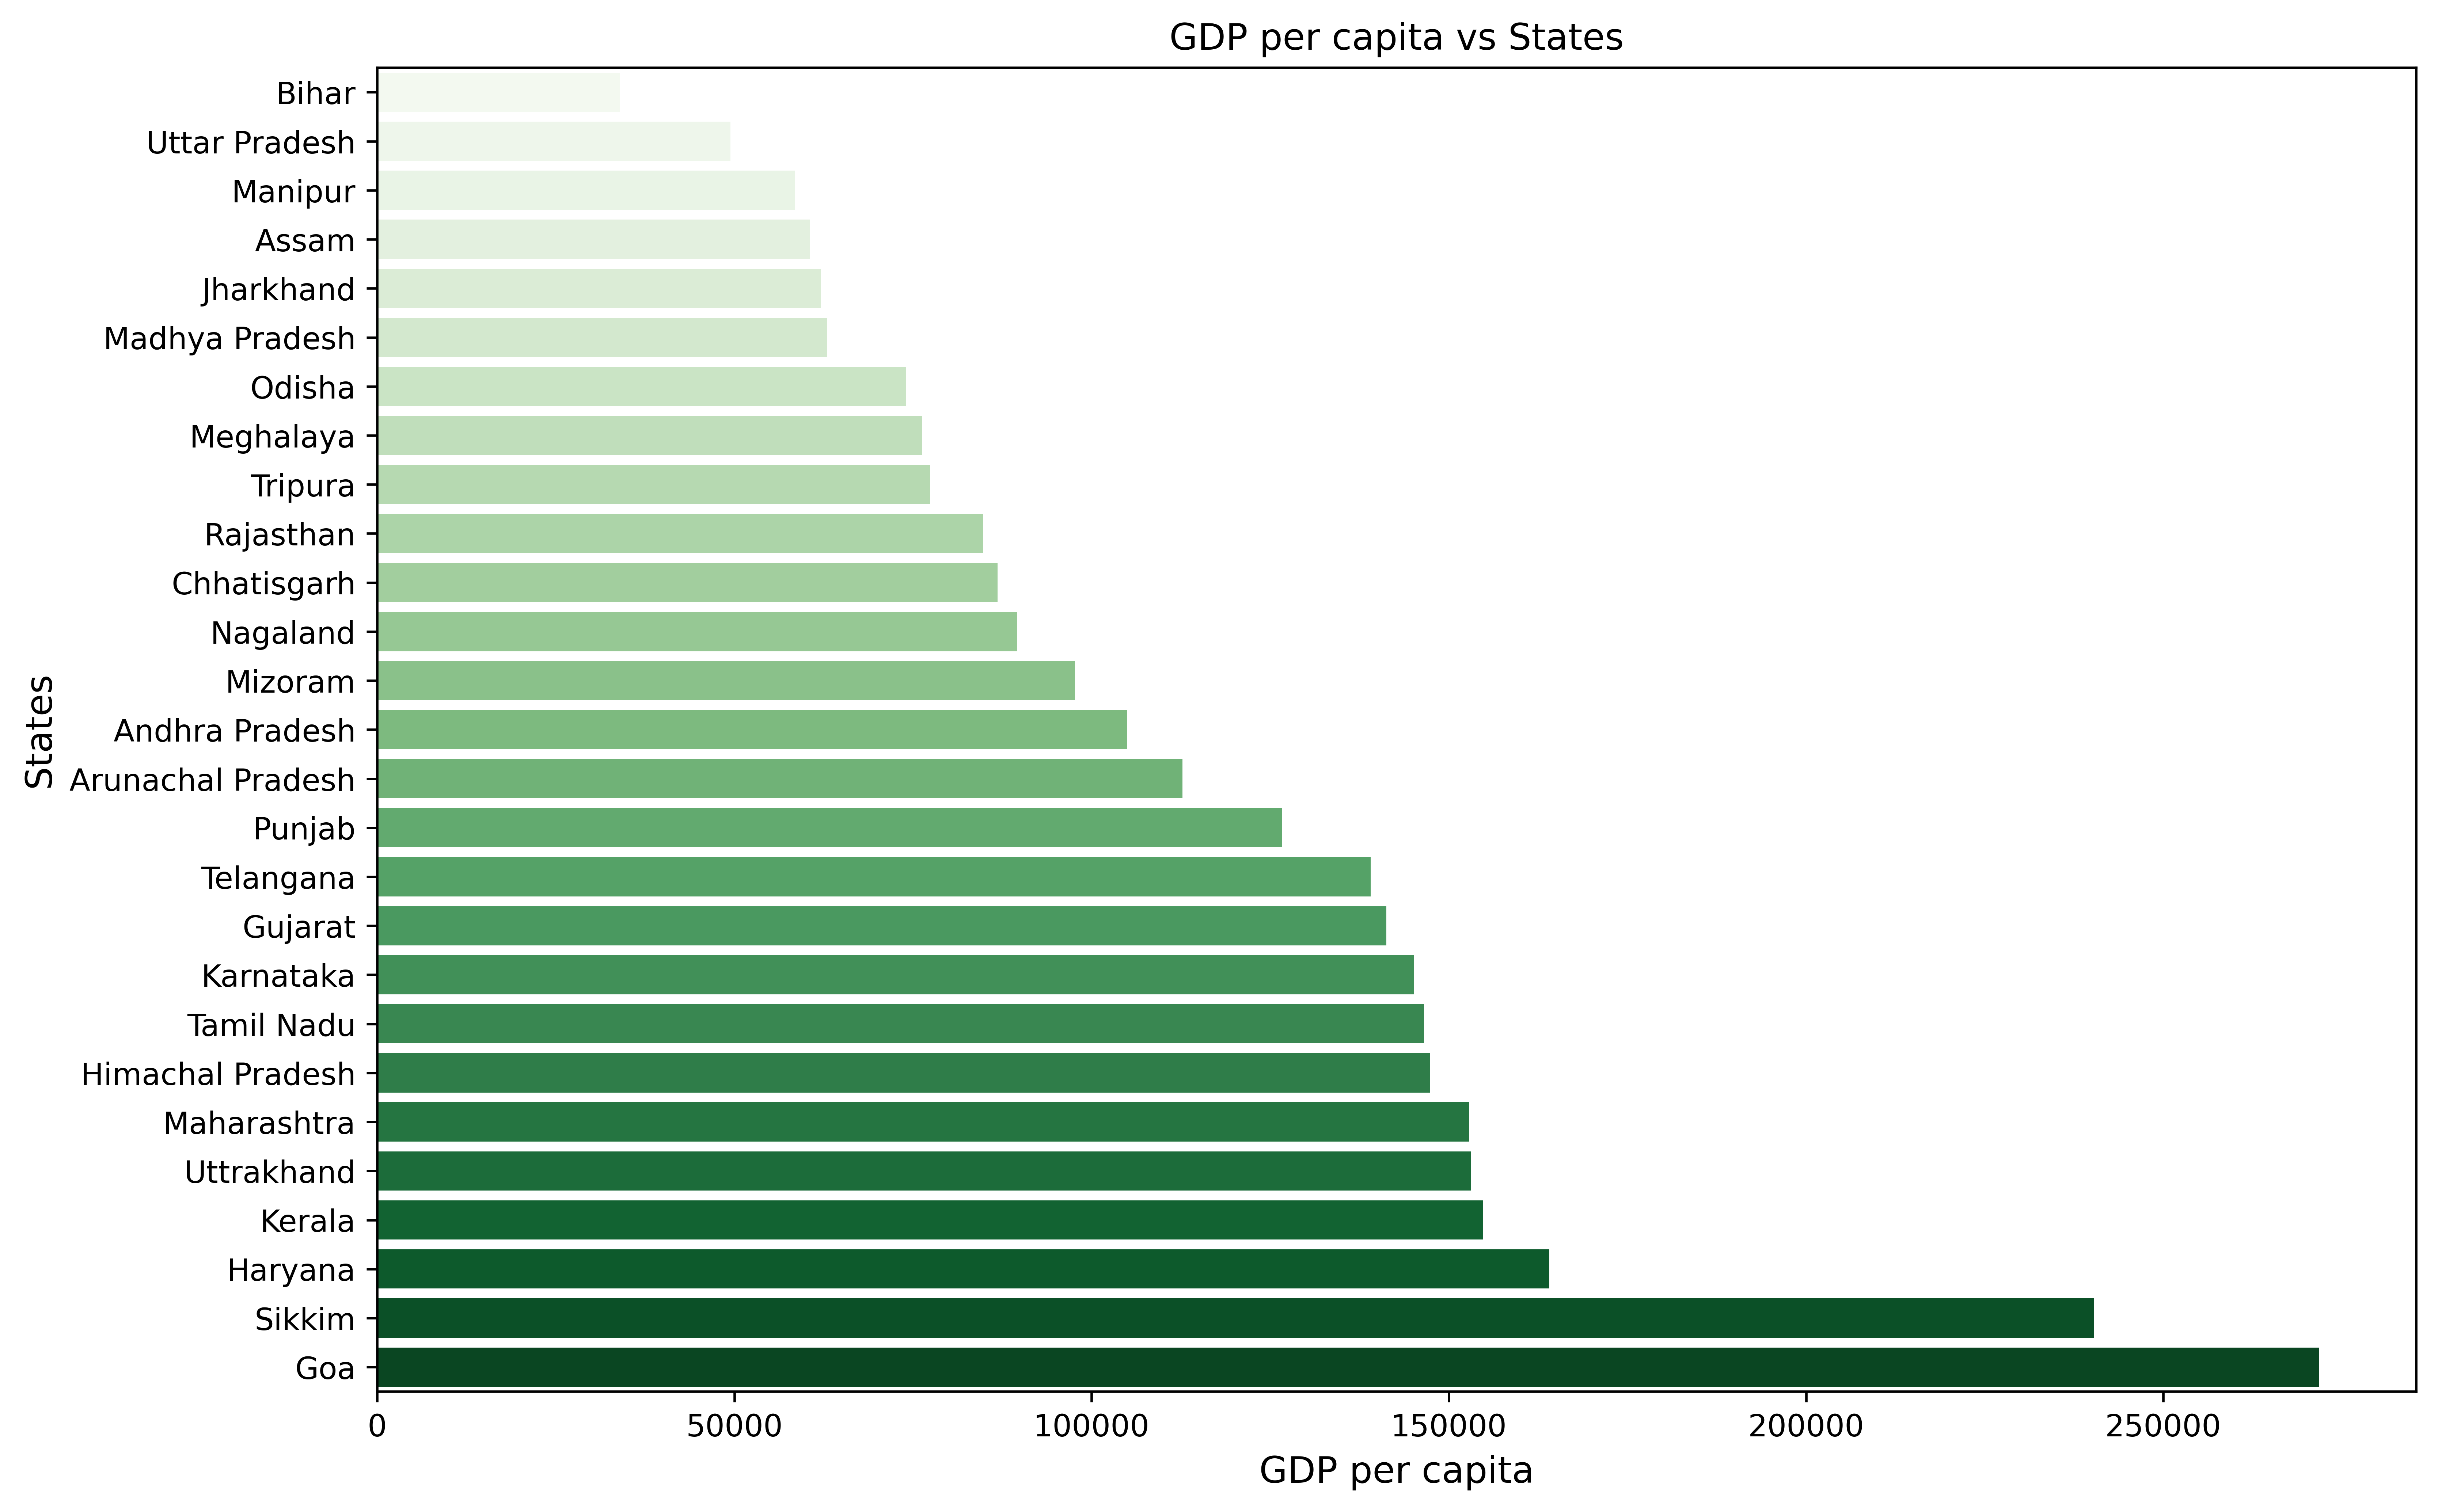

In [91]:
plt.figure(figsize=(12,8), dpi=600)                             

sns.barplot(x = gdp_per_capita['GDP per capita'], y =gdp_per_capita.index, palette='Greens' )
plt.xlabel('GDP per capita', fontsize=12)
plt.ylabel('States', fontsize=12)
plt.title('GDP per capita vs States',fontsize=12)
plt.show()

**Top 5 states based on GDP per capita**

In [92]:
top_5_gdp_per_capita = gdp_per_capita[-5:]
top_5_gdp_per_capita

,GDP per capita
Uttrakhand,153076.0
Kerala,154778.0
Haryana,164077.0
Sikkim,240274
Goa,271793


**Bottom 5 states based on GDP per capita**

In [93]:
bottom_5_gdp_per_capita = gdp_per_capita[:5]
bottom_5_gdp_per_capita

,GDP per capita
Bihar,33954
Uttar Pradesh,49450
Manipur,58442.0
Assam,60621
Jharkhand,62091


**Ratio of highest per capita GDP tp the lowest per capita GDP**

In [94]:
ratio = gdp_per_capita['GDP per capita'].max()/gdp_per_capita['GDP per capita'].min()
print('The Ratio of highest per capita GDP to the lowest per capita GDP is: ',ratio)

The Ratio of highest per capita GDP to the lowest per capita GDP is:  8.004741709371503


In [96]:
# Identifying the Primary, Secondary and the tertiary sectors and concating these to form a dataframe

primary = df_final[df_final['Item']=='Primary']
secondary = df_final[df_final['Item']=='Secondary']
tertiary = df_final[df_final['Item']=='Tertiary']
gdp = df_final[df_final['Item']=='Gross State Domestic Product']

pst = pd.concat([primary, secondary,tertiary,gdp], axis = 0).reset_index()
pst =  pst.drop(['index','S.No.'], axis = 1).set_index('Item')

In [97]:
pst

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhatisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jharkhand,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttrakhand,Uttar Pradesh
Item,,,,,,,,,,,,,,,,,,,,,
Primary,16303716,716959,5326697,8019997,6400817,312129,15887187.0,8040424.0,1548366,5248354,...,616178,9009306,9296070,19113780,138776,13329774.0,9133354,942216.0,1845972.0,25999255
Secondary,10488884,287489,4033091,5984896,8238886,1547536,33023538.0,12561411.0,4119162,6241471,...,212361,8989693,7904914,13028794,845253,32841892.0,9924001,484393.0,7642865.0,25548724
Tertiary,22032942,631844,9307109,22179969,7588778,1738217,30220377.0,19226568.0,4133326,8133341,...,992956,12256258,16717805,26015812,483103,53343788.0,28471410,1484709.0,5587975.0,45968959
Gross State Domestic Product,52646842,1676119,19809800,37391988,23498180,4063307,89502727.0,43746207.0,10436879,21710718,...,1841424,32197092,36801089,61219447,1520933,109256373.0,51117765,2966662.0,16198529.0,104337115


In [98]:
# calculating the percentage contribution of each sector to the Gross State Domestic Product for each state

pst.loc['primary_percentage'] = pst.loc['Primary'] / pst.loc['Gross State Domestic Product'] * 100
pst.loc['secondary_percentage'] = pst.loc['Secondary'] / pst.loc['Gross State Domestic Product'] * 100
pst.loc['tertiary_percentage'] = pst.loc['Tertiary'] / pst.loc['Gross State Domestic Product'] * 100

In [99]:
pst

,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhatisgarh,Goa,Gujarat,Haryana,Himachal Pradesh,Jharkhand,...,Nagaland,Odisha,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttrakhand,Uttar Pradesh
Item,,,,,,,,,,,,,,,,,,,,,
Primary,1.630372e+07,7.169590e+05,5.326697e+06,8.019997e+06,6.400817e+06,3.121290e+05,1.588719e+07,8.040424e+06,1.548366e+06,5.248354e+06,...,6.161780e+05,9.009306e+06,9.296070e+06,1.911378e+07,1.387760e+05,1.332977e+07,9.133354e+06,9.422160e+05,1.845972e+06,2.599926e+07
Secondary,1.048888e+07,2.874890e+05,4.033091e+06,5.984896e+06,8.238886e+06,1.547536e+06,3.302354e+07,1.256141e+07,4.119162e+06,6.241471e+06,...,2.123610e+05,8.989693e+06,7.904914e+06,1.302879e+07,8.452530e+05,3.284189e+07,9.924001e+06,4.843930e+05,7.642865e+06,2.554872e+07
Tertiary,2.203294e+07,6.318440e+05,9.307109e+06,2.217997e+07,7.588778e+06,1.738217e+06,3.022038e+07,1.922657e+07,4.133326e+06,8.133341e+06,...,9.929560e+05,1.225626e+07,1.671780e+07,2.601581e+07,4.831030e+05,5.334379e+07,2.847141e+07,1.484709e+06,5.587975e+06,4.596896e+07
Gross State Domestic Product,5.264684e+07,1.676119e+06,1.980980e+07,3.739199e+07,2.349818e+07,4.063307e+06,8.950273e+07,4.374621e+07,1.043688e+07,2.171072e+07,...,1.841424e+06,3.219709e+07,3.680109e+07,6.121945e+07,1.520933e+06,1.092564e+08,5.111776e+07,2.966662e+06,1.619853e+07,1.043371e+08
primary_percentage,3.096808e+01,4.277495e+01,2.688920e+01,2.144844e+01,2.723963e+01,7.681649e+00,1.775051e+01,1.837971e+01,1.483553e+01,2.417402e+01,...,3.346204e+01,2.798174e+01,2.526031e+01,3.122175e+01,9.124399e+00,1.220045e+01,1.786728e+01,3.176014e+01,1.139592e+01,2.491851e+01
secondary_percentage,1.992310e+01,1.715206e+01,2.035907e+01,1.600582e+01,3.506180e+01,3.808563e+01,3.689668e+01,2.871429e+01,3.946737e+01,2.874834e+01,...,1.153243e+01,2.792082e+01,2.148011e+01,2.128212e+01,5.557464e+01,3.005947e+01,1.941400e+01,1.632788e+01,4.718246e+01,2.448671e+01
tertiary_percentage,4.185045e+01,3.769685e+01,4.698235e+01,5.931744e+01,3.229517e+01,4.277838e+01,3.376476e+01,4.395025e+01,3.960308e+01,3.746233e+01,...,5.392327e+01,3.806635e+01,4.542747e+01,4.249599e+01,3.176360e+01,4.882442e+01,5.569768e+01,5.004645e+01,3.449681e+01,4.405811e+01


In [100]:
# Transposing the dataframe for better readability

pst = pst.T
pst = pst.sort_values('Gross State Domestic Product')
pst

Item,Primary,Secondary,Tertiary,Gross State Domestic Product,primary_percentage,secondary_percentage,tertiary_percentage
Mizoram,225598.0,270072.0,637619.0,1155933.0,19.516529,23.363984,55.160550
Sikkim,138776.0,845253.0,483103.0,1520933.0,9.124399,55.574637,31.763595
Arunachal Pradesh,716959.0,287489.0,631844.0,1676119.0,42.774946,17.152064,37.696846
Manipur,383140.0,220173.0,1177334.0,1804276.0,21.235110,12.202845,65.252434
Nagaland,616178.0,212361.0,992956.0,1841424.0,33.462038,11.532434,53.923268
Meghalaya,451050.0,637942.0,1200655.0,2440807.0,18.479544,26.136520,49.190903
Tripura,942216.0,484393.0,1484709.0,2966662.0,31.760140,16.327880,50.046450
Goa,312129.0,1547536.0,1738217.0,4063307.0,7.681649,38.085628,42.778382
Himachal Pradesh,1548366.0,4119162.0,4133326.0,10436879.0,14.835527,39.467373,39.603084
Uttrakhand,1845972.0,7642865.0,5587975.0,16198529.0,11.395924,47.182463,34.496805


**Plotting the percentage contribution of the primary, secondary and tertiary sectors as a percentage of the total GDP for all the states.**

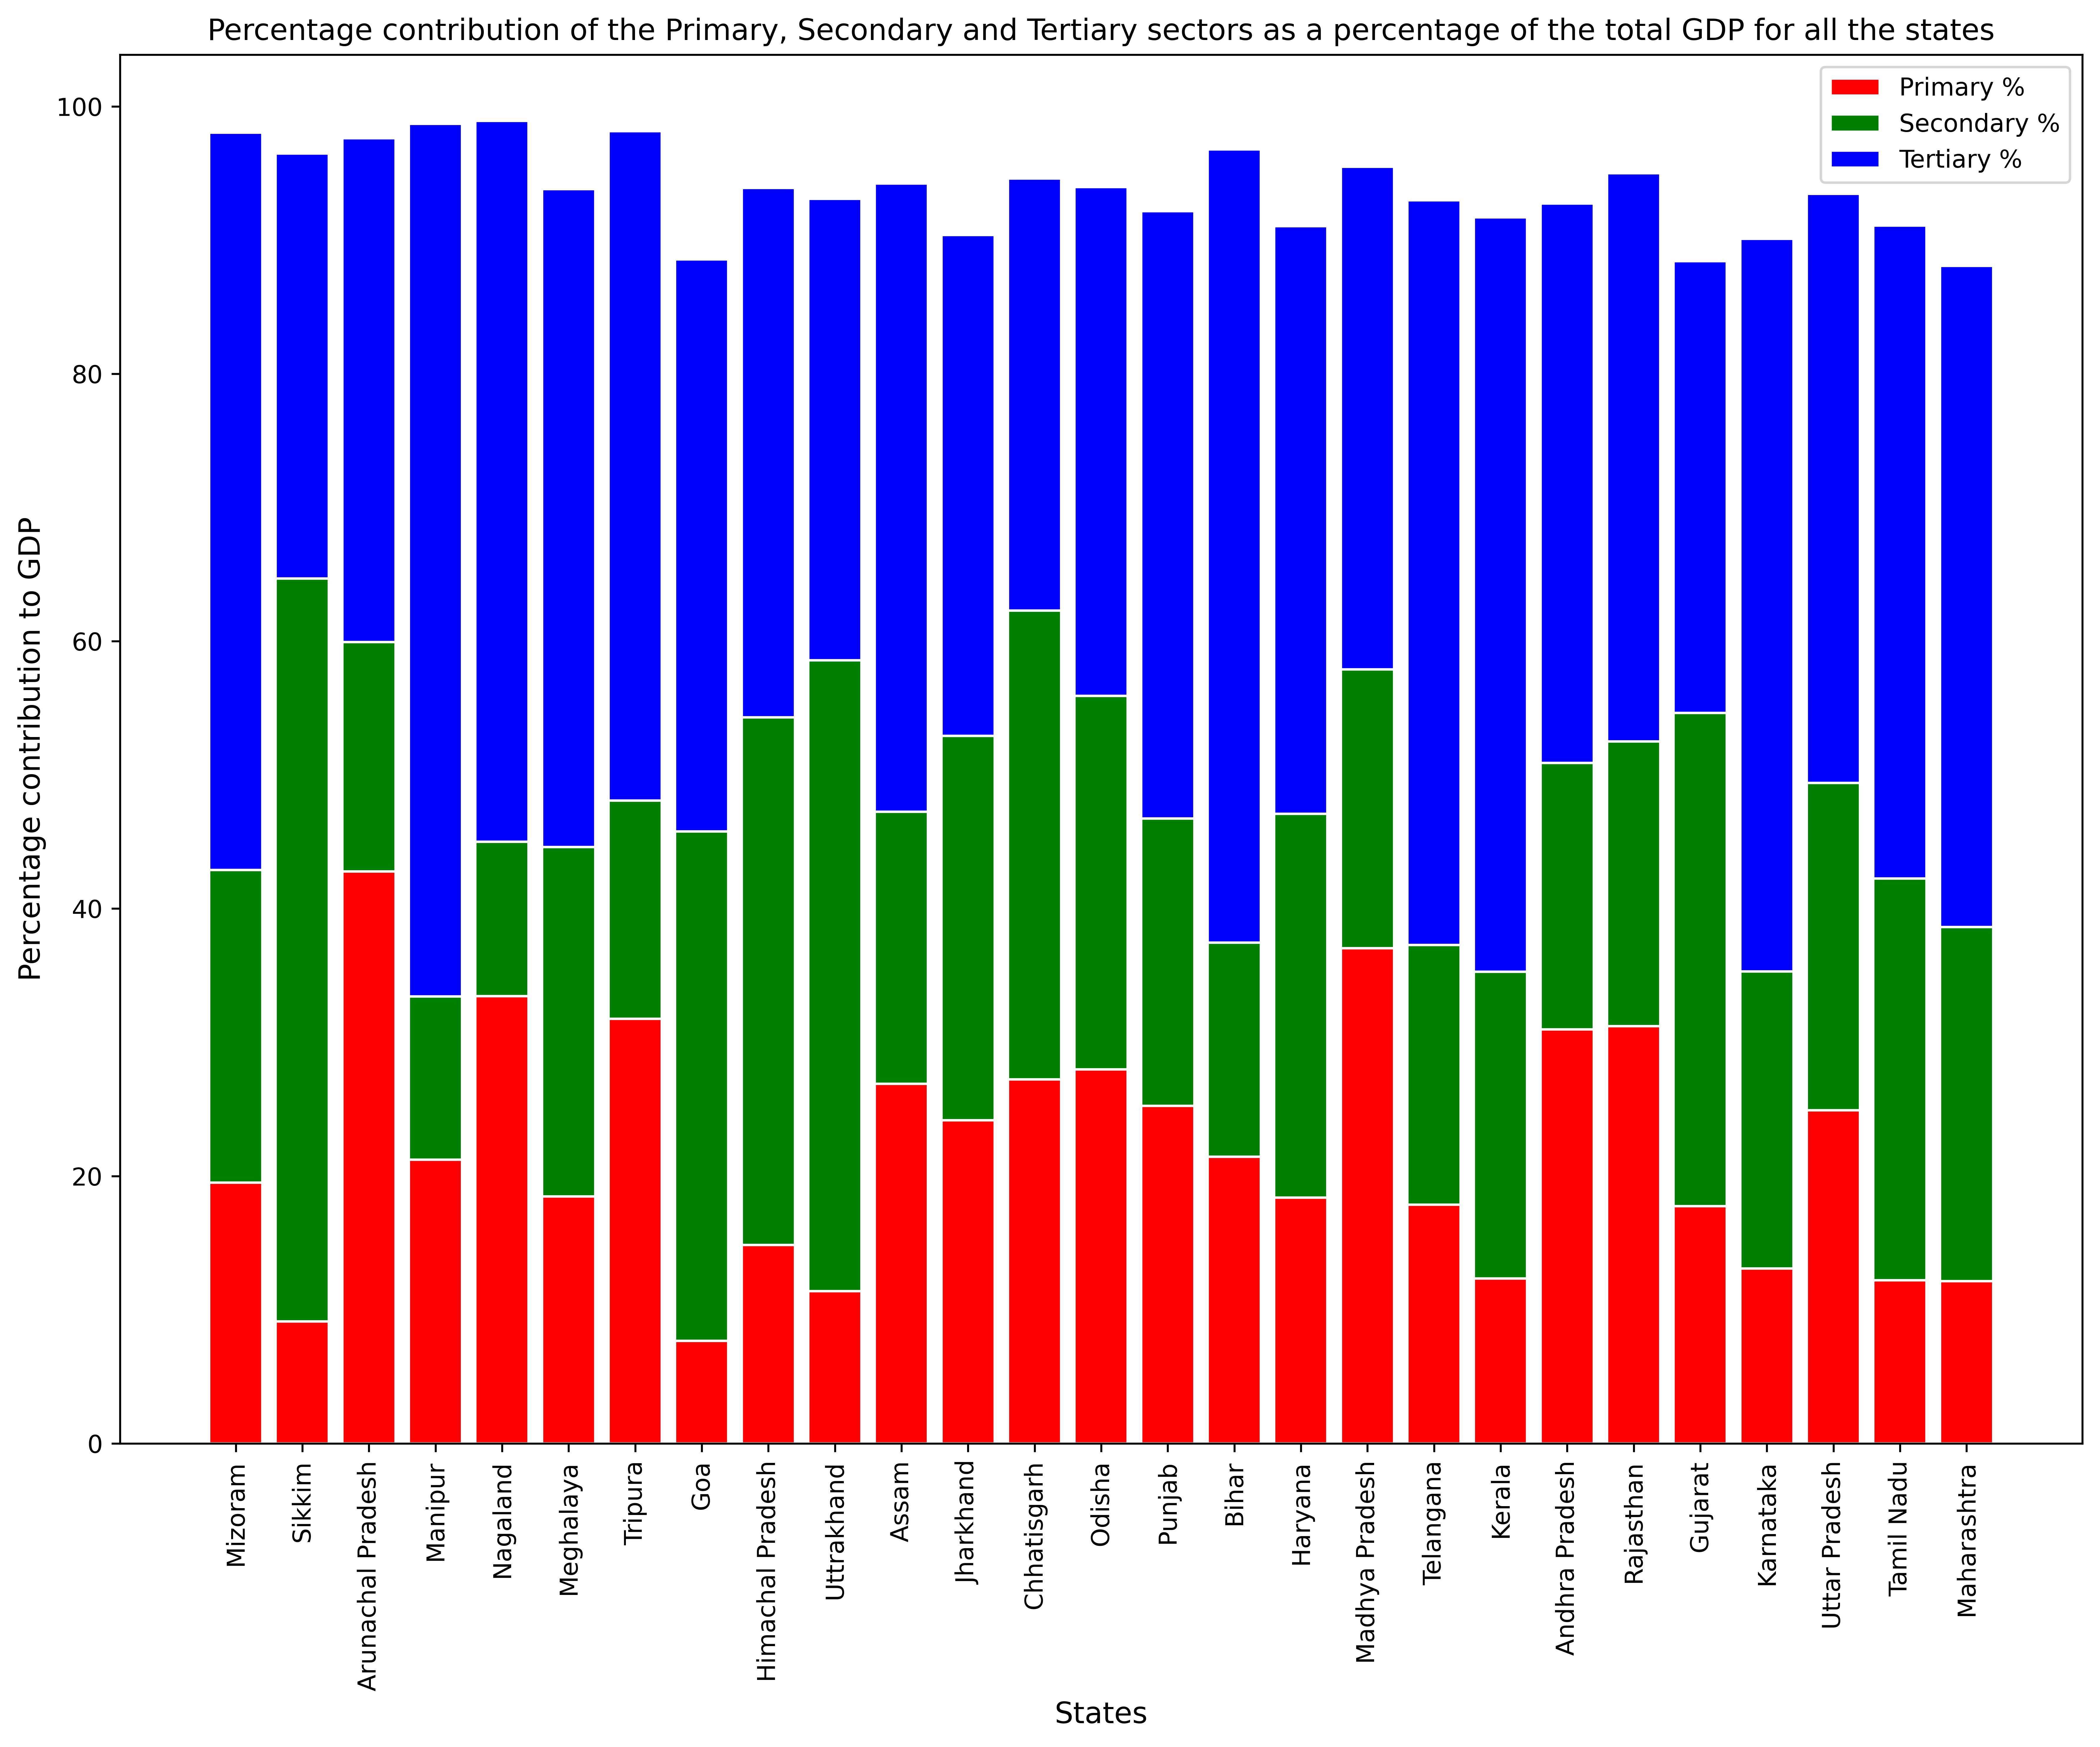

In [105]:
plt.figure(figsize=(12,10), dpi =600)

bars1 = pst['primary_percentage']
bars2 = pst['secondary_percentage']
bars3 = pst['tertiary_percentage']
 
legends = ['Primary %', 'Secondary %', 'Tertiary %']

bars = np.add(bars1, bars2).tolist()
 
r = np.arange(0,len(pst.index))
 
names = pst.index
barWidth = 1
 
# Create red bars
plt.bar(r, bars1, color='red', edgecolor='white')
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='green', edgecolor='white')
# Create blue bars (top)
plt.bar(r, bars3, bottom=bars, color='blue', edgecolor='white')
 
plt.xticks(r, names,rotation=90)
plt.xlabel('States',fontsize=12)
plt.ylabel('Percentage contribution to GDP',fontsize=12)
plt.title('Percentage contribution of the Primary, Secondary and Tertiary sectors as a percentage of the total GDP for all the states')

plt.legend(legends)

plt.tight_layout()

**Dividing the states in to group based on GDP per capita for the 20th, 50th, 85th and 100th percentile values**

In [106]:
gdp_per_capita

,GDP per capita
Bihar,33954
Uttar Pradesh,49450
Manipur,58442.0
Assam,60621
Jharkhand,62091
Madhya Pradesh,62989
Odisha,73979
Meghalaya,76228.0
Tripura,77358.0
Rajasthan,84837


In [107]:
# States between the 85th and 100th percentile

C1 = gdp_per_capita[gdp_per_capita['GDP per capita'] > gdp_per_capita['GDP per capita'].quantile(0.85)]
C1

,GDP per capita
Kerala,154778.0
Haryana,164077.0
Sikkim,240274
Goa,271793


In [108]:
# States between the 50th and 85th percentile

C2 = gdp_per_capita[(gdp_per_capita['GDP per capita'] > gdp_per_capita['GDP per capita'].quantile(0.50)) & (gdp_per_capita['GDP per capita'] < gdp_per_capita['GDP per capita'].quantile(0.85))]
C2

,GDP per capita
Arunachal Pradesh,112718
Punjab,126606
Telangana,139035
Gujarat,141263.0
Karnataka,145141
Tamil Nadu,146503.0
Himachal Pradesh,147330
Maharashtra,152853
Uttrakhand,153076.0


In [109]:
# States between the 20th and 50th percentile

C3 = gdp_per_capita[(gdp_per_capita['GDP per capita'] > gdp_per_capita['GDP per capita'].quantile(0.20)) & (gdp_per_capita['GDP per capita'] <= gdp_per_capita['GDP per capita'].quantile(0.50))]
C3

,GDP per capita
Odisha,73979
Meghalaya,76228.0
Tripura,77358.0
Rajasthan,84837
Chhatisgarh,86860
Nagaland,89607
Mizoram,97687
Andhra Pradesh,104977


In [110]:
# States below the 20th percentile

C4 = gdp_per_capita[gdp_per_capita['GDP per capita'] < gdp_per_capita['GDP per capita'].quantile(0.20)]
C4

,GDP per capita
Bihar,33954
Uttar Pradesh,49450
Manipur,58442.0
Assam,60621
Jharkhand,62091
Madhya Pradesh,62989


**Creating dataframe for C1, C2, C3 and C4 states**

In [112]:
C1_df = df_final[['S.No.','Item']+list(states for states in C1.index)]
C2_df = df_final[['S.No.','Item']+list(states for states in C2.index)]
C3_df = df_final[['S.No.','Item']+list(states for states in C3.index)]
C4_df = df_final[['S.No.','Item']+list(states for states in C4.index)]

In [113]:
C1_df = C1_df.iloc[[0,5,7,8,9,11,14,22,23,24,25,30,32]]
C2_df = C2_df.iloc[[0,5,7,8,9,11,14,22,23,24,25,30,32]]
C3_df = C3_df.iloc[[0,5,7,8,9,11,14,22,23,24,25,30,32]]
C4_df = C4_df.iloc[[0,5,7,8,9,11,14,22,23,24,25,30,32]]

In [114]:
C1_df.reset_index(drop=True, inplace=True)
C2_df.reset_index(drop=True, inplace=True)
C3_df.reset_index(drop=True, inplace=True)
C4_df.reset_index(drop=True, inplace=True)

In [115]:
C1_df

,S.No.,Item,Kerala,Haryana,Sikkim,Goa
0,1,"Agriculture, forestry and fishing",5930617.0,8015238.0,137447,308507
1,2,Mining and quarrying,558824.0,25186.0,1329,3622
2,3,Manufacturing,4273567.0,7756921.0,550697,1177608
3,4,"Electricity, gas, water supply & other utility...",482470.0,1101919.0,212499,204110
4,5,Construction,7314003.0,3702571.0,82058,165819
5,6,"Trade, repair, hotels and restaurants",8557345.0,4986319.0,70568,380927
6,7,"Transport, storage, communication & services r...",4020934.0,2560623.0,47347,189656
7,8,Financial services,2010306.0,1671486.0,21079,233618
8,9,"Real estate, ownership of dwelling & professio...",7287633.0,6970183.0,75330,407099
9,10,Public administration,2068915.0,1036377.0,119514,346486


In [116]:
# Creating the column for Total values for all sub-sectors for all the states and the column for the percentage contribution
# to the total GSDP by each of the sub-sectors for all the states

C1_df['Total for all states'] = C1_df['Kerala']+C1_df['Haryana']+C1_df['Sikkim']+C1_df['Goa']
C1_df['Percentage of Total GDP'] = C1_df['Total for all states']/C1_df['Total for all states'][11] * 100
C1_df

,S.No.,Item,Kerala,Haryana,Sikkim,Goa,Total for all states,Percentage of Total GDP
0,1,"Agriculture, forestry and fishing",5930617.0,8015238.0,137447,308507,14391809.0,14.119213
1,2,Mining and quarrying,558824.0,25186.0,1329,3622,588961.0,0.577805
2,3,Manufacturing,4273567.0,7756921.0,550697,1177608,13758793.0,13.498187
3,4,"Electricity, gas, water supply & other utility...",482470.0,1101919.0,212499,204110,2000998.0,1.963097
4,5,Construction,7314003.0,3702571.0,82058,165819,11264451.0,11.051090
5,6,"Trade, repair, hotels and restaurants",8557345.0,4986319.0,70568,380927,13995159.0,13.730076
6,7,"Transport, storage, communication & services r...",4020934.0,2560623.0,47347,189656,6818560.0,6.689409
7,8,Financial services,2010306.0,1671486.0,21079,233618,3936489.0,3.861928
8,9,"Real estate, ownership of dwelling & professio...",7287633.0,6970183.0,75330,407099,14740245.0,14.461049
9,10,Public administration,2068915.0,1036377.0,119514,346486,3571292.0,3.503648


In [117]:
# Identifying the major sub-sectors contributing more to the GSDP  by finding the cumulative sum

C1_contributor = C1_df[['Item','Percentage of Total GDP']][:-2].sort_values(by='Percentage of Total GDP', ascending=False)
C1_contributor.reset_index(drop=True, inplace=True)
C1_contributor['Cumulative sum'] = C1_contributor['Percentage of Total GDP'].cumsum()
C1_contributor

,Item,Percentage of Total GDP,Cumulative sum
0,"Real estate, ownership of dwelling & professio...",14.461049,14.461049
1,"Agriculture, forestry and fishing",14.119213,28.580261
2,"Trade, repair, hotels and restaurants",13.730076,42.310337
3,Manufacturing,13.498187,55.808524
4,Construction,11.051090,66.859614
5,Other services,7.907258,74.766872
6,"Transport, storage, communication & services r...",6.689409,81.456281
7,Financial services,3.861928,85.318209
8,Public administration,3.503648,88.821857
9,"Electricity, gas, water supply & other utility...",1.963097,90.784954


In [118]:
# Identifying the major sub-sectors contributing more to the GSDP  by finding the cumulative sum

C1_contributor = C1_df[['Item','Percentage of Total GDP']][:-2].sort_values(by='Percentage of Total GDP', ascending=False)
C1_contributor.reset_index(drop=True, inplace=True)
C1_contributor['Cumulative sum'] = C1_contributor['Percentage of Total GDP'].cumsum()
C1_contributor

,Item,Percentage of Total GDP,Cumulative sum
0,"Real estate, ownership of dwelling & professio...",14.461049,14.461049
1,"Agriculture, forestry and fishing",14.119213,28.580261
2,"Trade, repair, hotels and restaurants",13.730076,42.310337
3,Manufacturing,13.498187,55.808524
4,Construction,11.051090,66.859614
5,Other services,7.907258,74.766872
6,"Transport, storage, communication & services r...",6.689409,81.456281
7,Financial services,3.861928,85.318209
8,Public administration,3.503648,88.821857
9,"Electricity, gas, water supply & other utility...",1.963097,90.784954


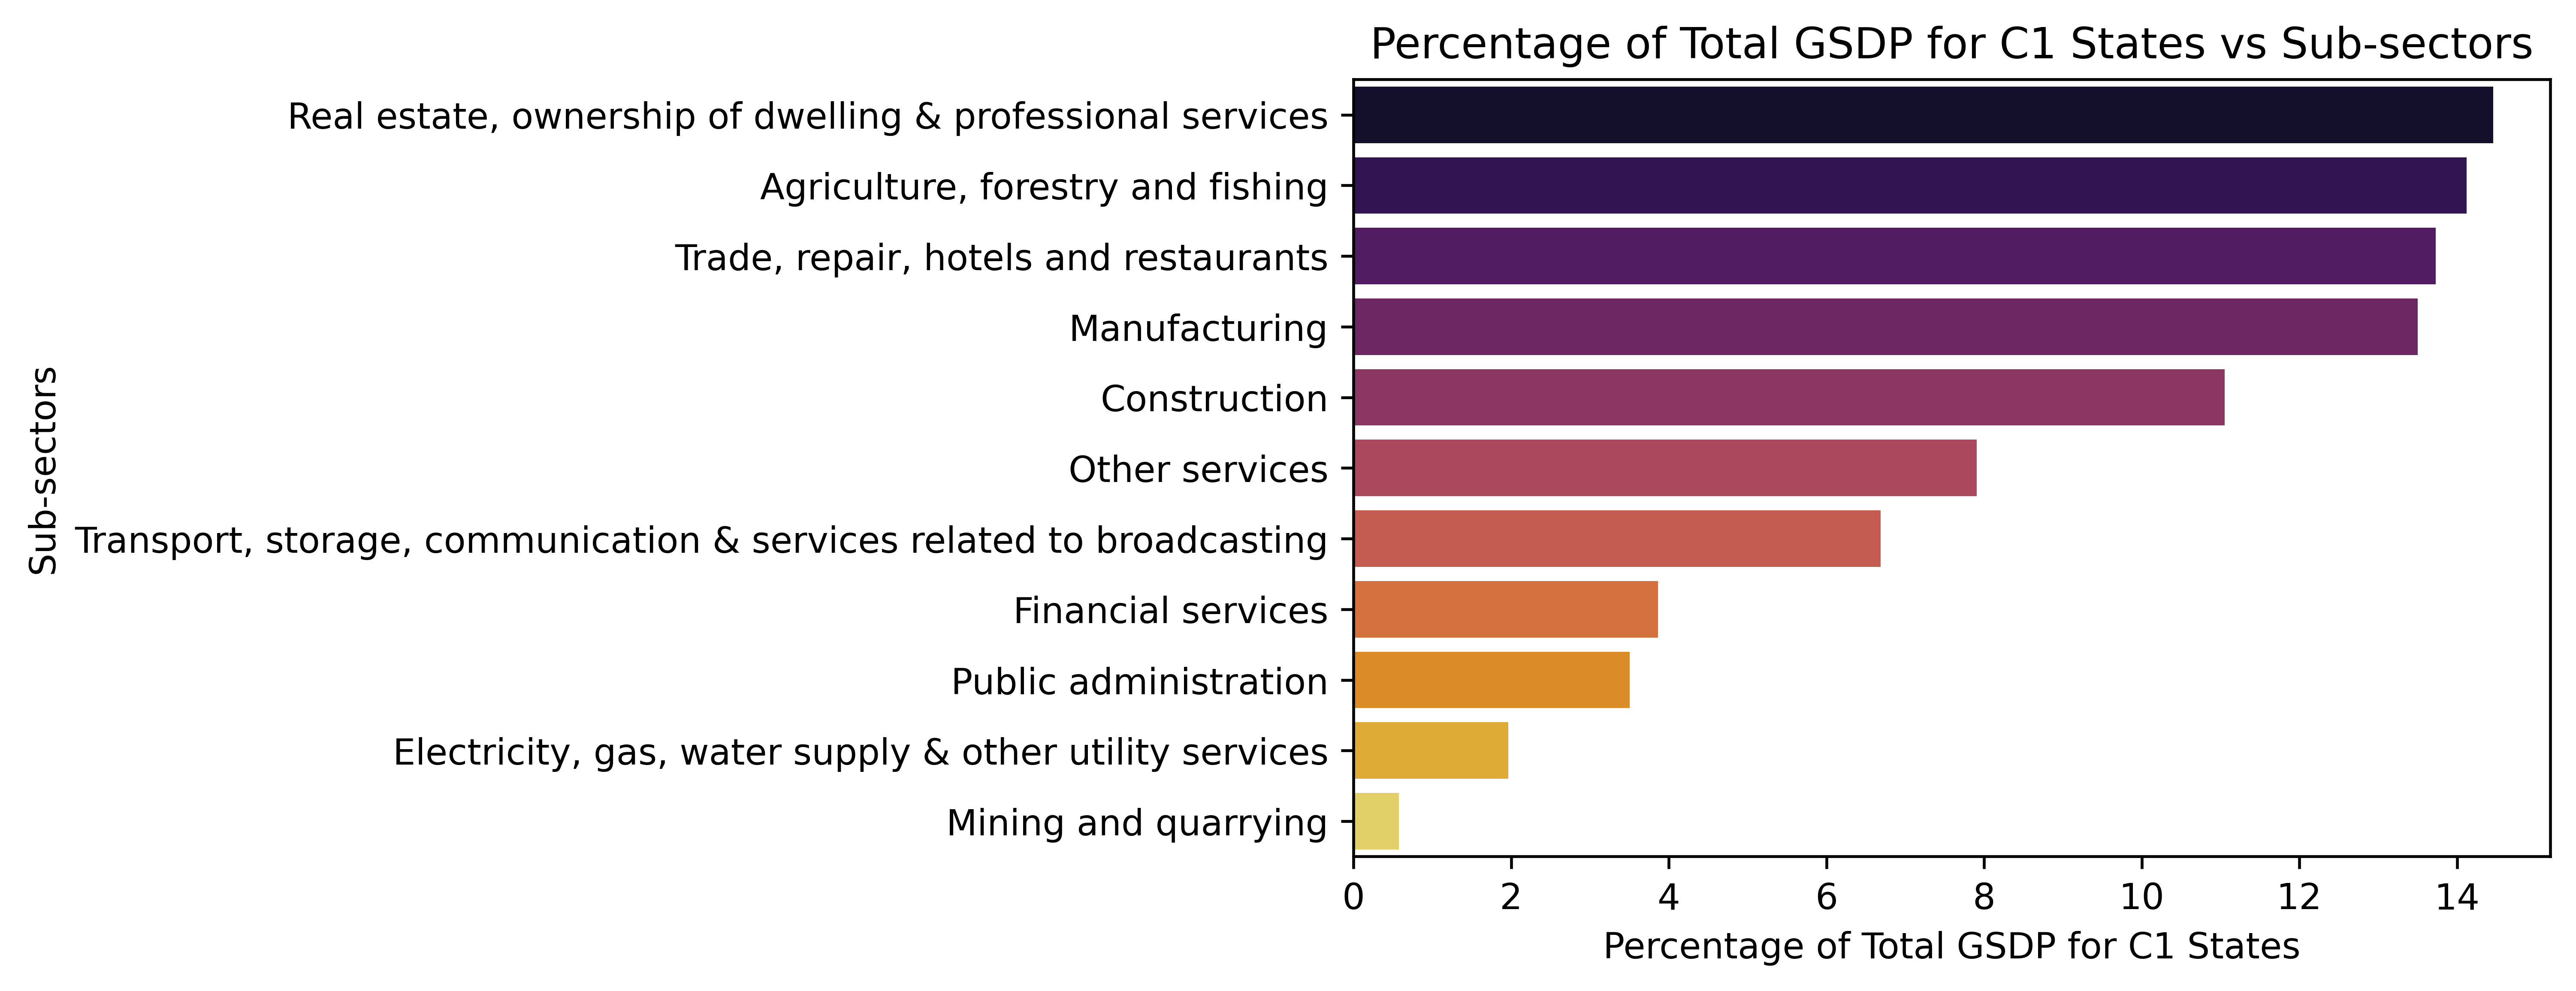

In [121]:
plt.figure(figsize=(6,4), dpi=600)
sns.barplot(y=C1_contributor['Item'], x = C1_contributor['Percentage of Total GDP'], palette='inferno')
plt.xlabel("Percentage of Total GSDP for C1 States")
plt.ylabel('Sub-sectors')
plt.title('Percentage of Total GSDP for C1 States vs Sub-sectors')
plt.savefig("Percentage of Total GSDP for C1 States vs Sub-sectors.png", bbox_inches='tight', dpi=600)

plt.show()

**C1 States:
We can see that for C1 states subsectors like Real Estate, Agriculture, Trade and Hotels, Manufacturing contribute evenly with very high contribution for each category which leads to the overall increase in the GDP for C1 States.
Construction also contributes substantially to the total GDP for C1 states as these states have rapid urbanization taking place which leads to increase in overall GDP.**

In [123]:
C2_df['Total for all states']=list(C2_df[list(states for states in C2_df.columns)[2:]].sum(axis=1))
C2_df['Percentage of Total GDP'] = C2_df['Total for all states']/C2_df['Total for all states'][11] * 100
C2_contributor = C2_df[['Item','Percentage of Total GDP']][:-2].sort_values(by='Percentage of Total GDP', ascending=False)
C2_contributor.reset_index(drop=True, inplace=True)
C2_contributor['Cumulative sum'] = C2_contributor['Percentage of Total GDP'].cumsum()
C2_contributor

,Item,Percentage of Total GDP,Cumulative sum
0,Manufacturing,18.622130,18.622130
1,"Real estate, ownership of dwelling & professio...",15.710184,34.332314
2,"Agriculture, forestry and fishing",12.825977,47.158291
3,"Trade, repair, hotels and restaurants",10.443537,57.601828
4,Construction,6.932967,64.534795
5,Financial services,6.189947,70.724742
6,Other services,6.182617,76.907359
7,"Transport, storage, communication & services r...",5.755616,82.662975
8,Public administration,3.166513,85.829489
9,"Electricity, gas, water supply & other utility...",2.357408,88.186896


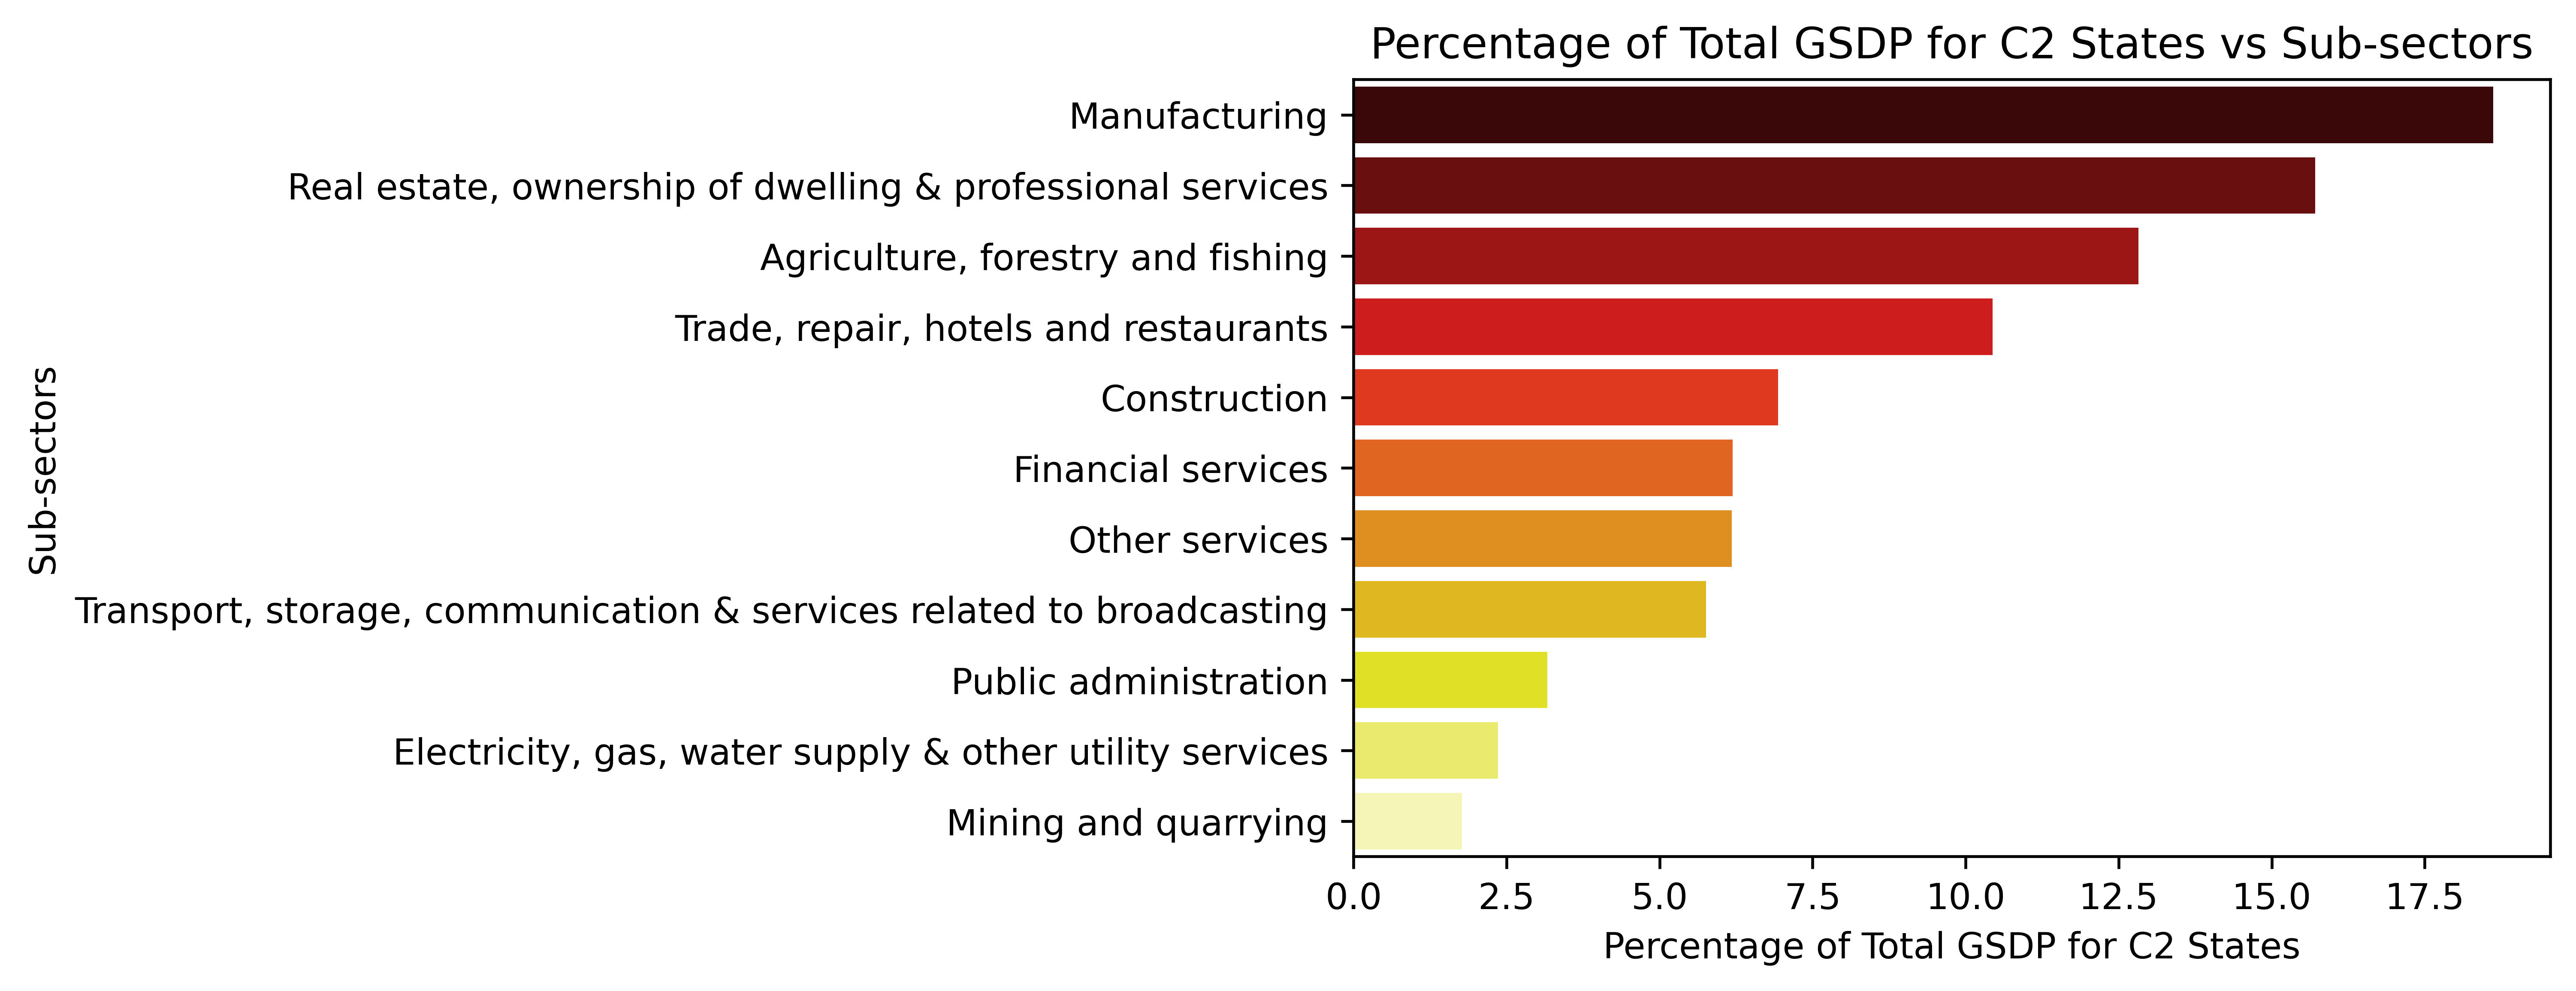

In [124]:
plt.figure(figsize=(6,4), dpi=600)
sns.barplot(y=C2_contributor['Item'], x = C2_contributor['Percentage of Total GDP'],palette='hot')
plt.xlabel("Percentage of Total GSDP for C2 States")
plt.ylabel('Sub-sectors')
plt.title('Percentage of Total GSDP for C2 States vs Sub-sectors')
plt.show()

**C2 States:
For C2 states Manufacturing leads in terms of overall contribution to GDP which comes a no surprise as states like Gujarat, Karnataka, Tamil Nadu and Maharashtra are considered to be manufacturing hubs of India which huge investments in the field of Automobiles and other tech industries are taking place in these states.
Real Estate and Professional services also contribute substantially to the total GDP for C2 states as these states have rapid urbanization taking place and people are moving to these states from villages in search of jobs and better livelihood.
Agriculture forms the backbone of India's GDP so it is obvious that it finds a place in the top 3 sub-sectors for C2 states as well but since rapid urbanization may be leading to less land available for agricultural purpose it contributes fairly less when compared to the top 2 sub-sectors.**

In [125]:
C3_df['Total for all states']=list(C3_df[list(states for states in C3_df.columns)[2:]].sum(axis=1))
C3_df['Percentage of Total GDP'] = C3_df['Total for all states']/C3_df['Total for all states'][11] * 100
C3_contributor = C3_df[['Item','Percentage of Total GDP']][:-2].sort_values(by='Percentage of Total GDP', ascending=False)
C3_contributor.reset_index(drop=True, inplace=True)
C3_contributor['Cumulative sum'] = C3_contributor['Percentage of Total GDP'].cumsum()
C3_contributor

,Item,Percentage of Total GDP,Cumulative sum
0,"Agriculture, forestry and fishing",23.727451,23.727451
1,Manufacturing,12.383423,36.110875
2,"Trade, repair, hotels and restaurants",9.690206,45.801080
3,"Real estate, ownership of dwelling & professio...",9.116395,54.917475
4,Construction,8.826341,63.743816
5,Other services,7.201032,70.944849
6,"Transport, storage, communication & services r...",6.872918,77.817767
7,Mining and quarrying,6.088662,83.906428
8,Public administration,4.454309,88.360737
9,Financial services,3.240065,91.600802


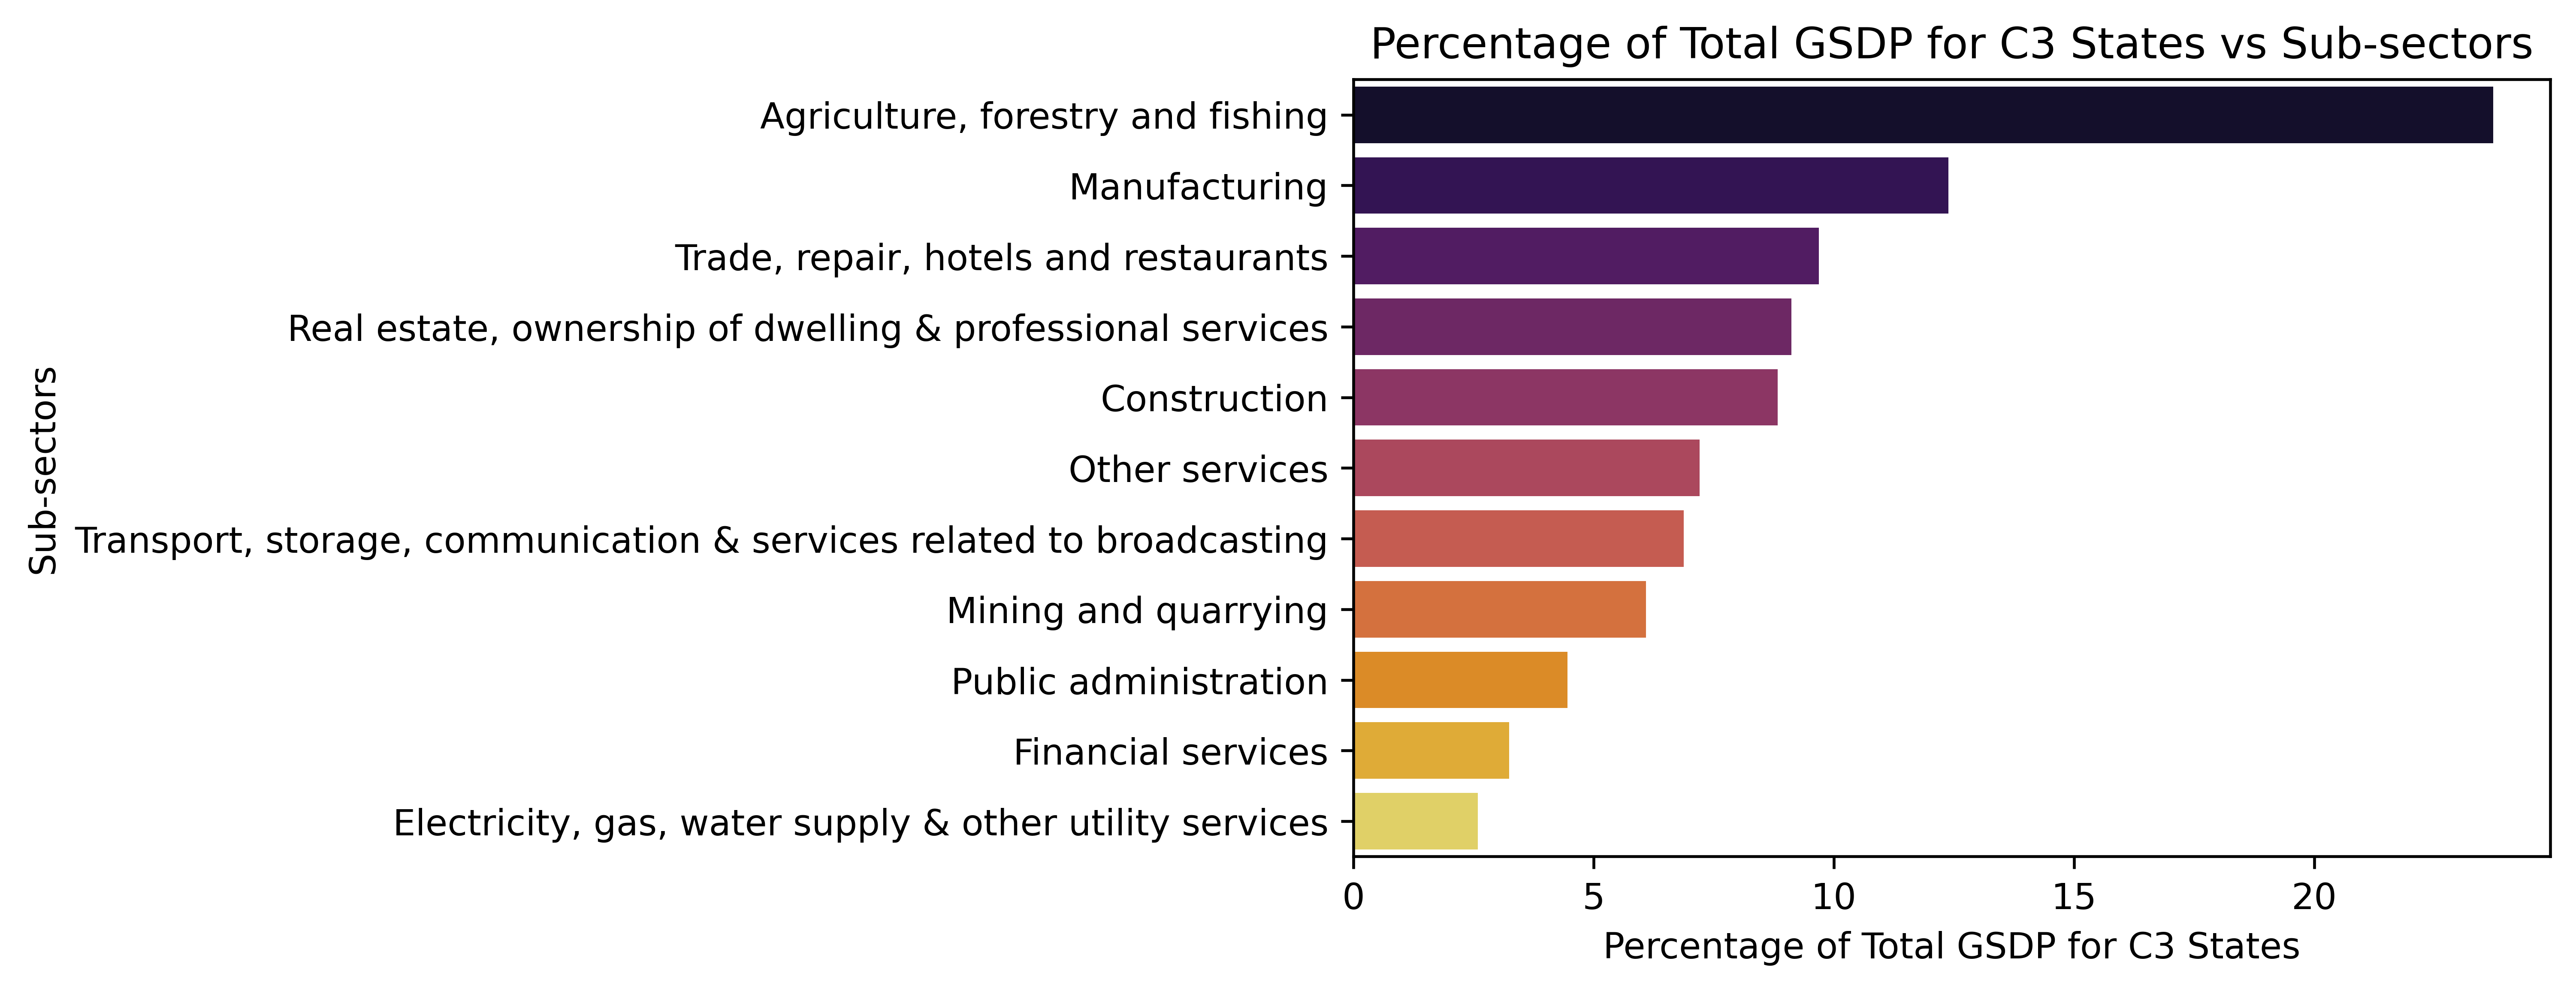

In [128]:
plt.figure(figsize=(6,4), dpi=600)
sns.barplot(y=C3_contributor['Item'], x = C3_contributor['Percentage of Total GDP'], palette='inferno')
plt.xlabel("Percentage of Total GSDP for C3 States")
plt.ylabel('Sub-sectors')
plt.title('Percentage of Total GSDP for C3 States vs Sub-sectors')

plt.show()

**C3 States:
C3 states like Andhra Pradesh, Odisha, Meghalaya, Chattisgarh, Mizoram have highly arable land and receive good amount of rain every year during the monsoon so it is obvious that Agriculture is the sub-sector that contributes more than 23% to these states.
Manufacturing is at a distant second place contributing about 12% to the overall GDP followed by Trade, Hotels and restraunts as these states are home to some of the top tourist attractions in India.
Slowly but steadily these states are experiencing increase in urbanization and hence Real Estate and Construction feature in the top 5 contributors as well.**

In [129]:
C4_df['Total for all states']=list(C4_df[list(states for states in C4_df.columns)[2:]].sum(axis=1))
C4_df['Percentage of Total GDP'] = C4_df['Total for all states']/C4_df['Total for all states'][11] * 100
C4_contributor = C4_df[['Item','Percentage of Total GDP']][:-2].sort_values(by='Percentage of Total GDP', ascending=False)
C4_contributor.reset_index(drop=True, inplace=True)
C4_contributor['Cumulative sum'] = C4_contributor['Percentage of Total GDP'].cumsum()
C4_contributor

,Item,Percentage of Total GDP,Cumulative sum
0,"Agriculture, forestry and fishing",24.323490,24.323490
1,"Trade, repair, hotels and restaurants",11.670484,35.993974
2,Manufacturing,10.691237,46.685211
3,"Real estate, ownership of dwelling & professio...",10.297100,56.982312
4,Construction,9.703136,66.685448
5,"Transport, storage, communication & services r...",6.894719,73.580167
6,Other services,6.662786,80.242952
7,Public administration,5.654635,85.897587
8,Financial services,3.281507,89.179094
9,Mining and quarrying,2.613661,91.792755


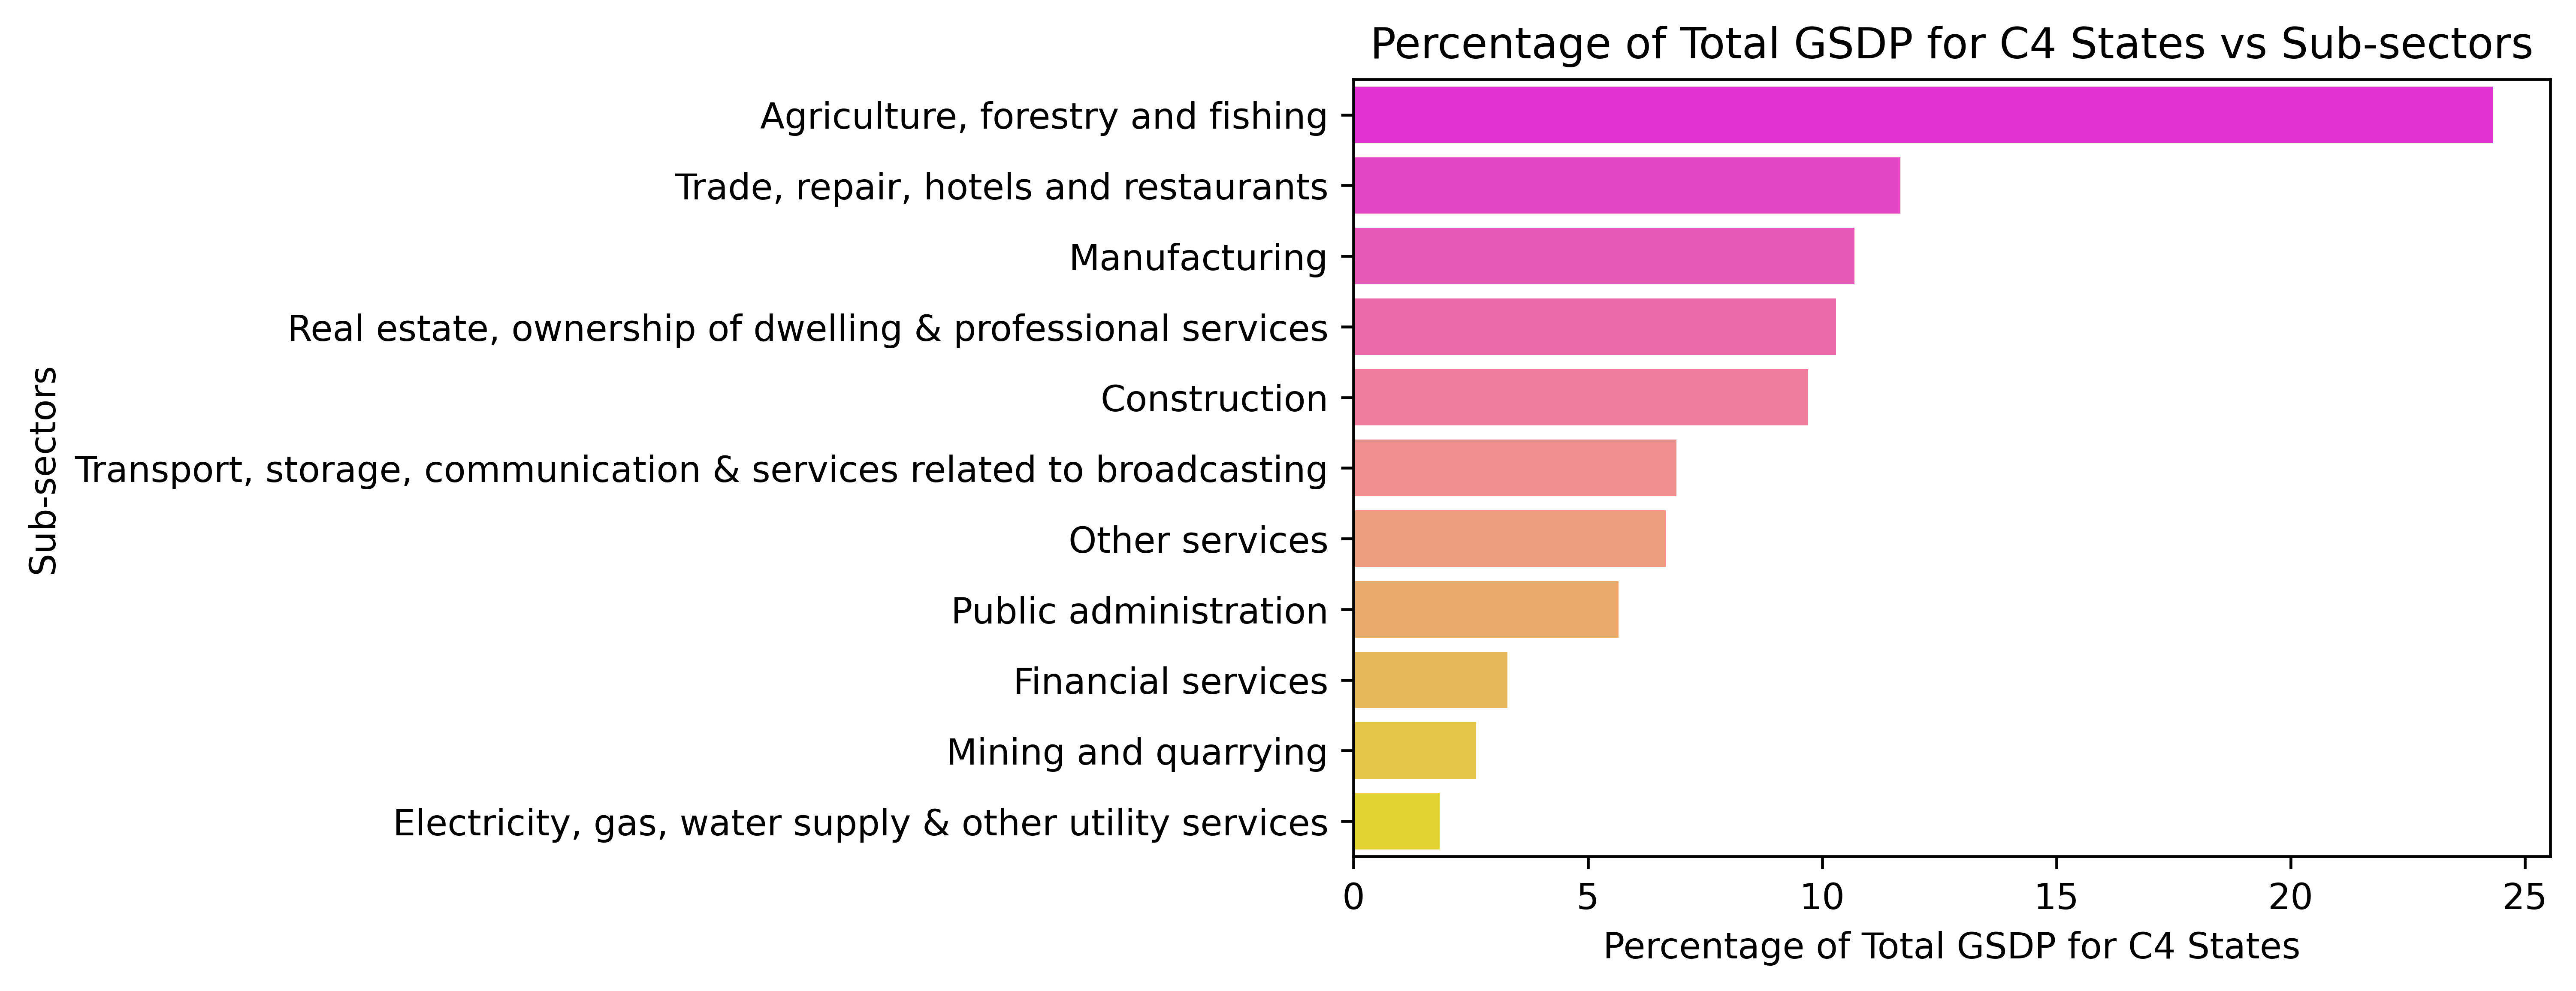

In [130]:
plt.figure(figsize=(6,4), dpi=600)
sns.barplot(y=C4_contributor['Item'], x = C4_contributor['Percentage of Total GDP'], palette='spring')
plt.xlabel("Percentage of Total GSDP for C4 States")
plt.ylabel('Sub-sectors')
plt.title('Percentage of Total GSDP for C4 States vs Sub-sectors')

plt.show()

**C4 States:
C4 states like Bihar, Jharkhand, Uttar Pradesh have low literacy rate and huge population(U.P. is the most populous state in India) and thus agriculture features at the top again.
UP is one of the top tourist attracting states as it is home to some of the most amazing places like Agra which has the Taj Mahal, Varansi (Regarded as the spiritual capital of India, the city draws Hindu pilgrims who bathe in the Ganges River’s sacred waters and perform funeral rites. Along the city's winding streets are some 2,000 temples, including Kashi Vishwanath, the “Golden Temple,” dedicated to the Hindu god Shiva.), Jim Corbett National Park, India's oldest national park, opened in 1936, with a Bengal tiger reserve, visitor centre & safaris.**

**C1, C2, C3 and C4 states:
The major sub sectors contributing to the economy of the states are:

Agriculture, Real Estate, Manufacturing, Trade Hotels and restraunts and Construction.
One key observation is that for C1,C2 states the major contribution comes from Real Estate which is reasonable as these states have a big real estate and housing industry due to people migrating from villages to these states for employment.
Agriculture forms the back-bone of the Indian economy and hence it features in the top 3 spot for all the category of states.
India is home to some of the top hotels, restraunts and tourist destinations and hence these contribute significantly to the economy as well.
Slowly but steadily India is working to increase its manufacturing capabilities and new companies are opening their factories in India which is the reason for manufacting appearing as a top contributor as well. The 'Make in India' initiative by PM. Modi is also helping to increase manufacturing activities in India.
For any country to improve the standard of living of its people, it requires good quality infrastructure. India is experincing rapid urbanization with several new roads, bridges, ports etc. being constructed to aid in increasing the GDP of India which is growing very fast and people need good quality jobs. Construction provides jobs to several people and leads to people having better livelihood.
Sub-sectors for which states should pay invest more or pay greater attention:

Improving Road, Railways, Air transpotation services will not only help in easier access for people to each and every nook and corner of India but also aid in transportation of goods and materials required for construction purposes. So all the catergories of states should improve Transportation seervices.
C1 States:
All the 4 states in C1 categories are top tourist destination so they should invest more in:
Trade, repair, hotels and restaurants.
Transport, storage, communication & services for easier access to tourist destination.
Being high GDP per capita states, they should focus on improving the Financial Services and also invest more in public administration.
C2 States:
C2 states comprises of some of the powerhouse states in India which contribute immensely to India's overall GDP:
States like Karnataka, Maharashtra, Tamil Nadu and Telengana are manufacturing hubs of India and thus should invest even more in the Manufacturing sector.
Same could also be said for Real estate indudtry as well.
Construction, Transportation and other services should also be looked at to improve the overall GDP.
C3 States:
C3 states should focus on:
Manufacturing Sector provinding easier access to lands to industries.
Mining and quarrying should also be considered as these states have large deposits of natural resources.
States in the C3 categories like Odisha, Mizoram, Nagaland, Tripura and Meghalaya are big tourist destinations so they should invest more in Trade, repair, hotels and restaurants and Transport, storage, communication & services.
C4 States:
C4 states should focus on:
States like UP and Bihar should focus on investing in Public administration,Transport, storage, communication & services as they have a very large population and some people still live in remote places with mo direct access to the major cities .
Invest more in Trade, repair, hotels and restaurants to boost tourism.
Construction is also area where more investment is needed and not to forget Transport, storage, communication & services.**

**Part-II: GDP and Education Dropout Rates**

In [144]:
# Reading the data and selecting the data for the year 2014-15 and the education level for Primary, Upper Primary and Secondary

data2 = pd.read_csv('/kaggle/input/gdp-data-for-indian-states/droupout rate.csv')
data2 = data2[['Level of Education - State','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015']]
data2

,Level of Education - State,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015
0,A & N Islands,0.51,1.69,9.870
1,Andhra Pradesh,6.72,5.20,15.710
2,Arunachal Pradesh,10.82,6.71,17.110
3,Assam,15.36,10.51,27.060
4,Bihar,NaN,4.08,25.900
5,Chandigarh,NaN,0.44,NaN
6,Chhatisgarh,2.91,5.85,21.260
7,Dadra & Nagar Haveli,1.47,4.02,16.770
8,Daman & Diu,1.11,3.11,32.270
9,Delhi,NaN,0.76,11.810


In [145]:
# Dropping rows of data which we do not need like Union Territories and for which we don't have GDP per-capita available like West Bengal

data2 =  data2.drop([0,5,7,8,9,14,18,26,35,36])
data2 = data2.reset_index(drop = True)
data2 = data2.rename(columns={'Level of Education - State': 'State'})

In [146]:
# Necessary transformation like resetting the index and renaming the column name for merging with another dataframe

states_gdp_per_capita = gdp_per_capita.reset_index()
states_gdp_per_capita=states_gdp_per_capita.rename(columns={'index':'State'})

In [147]:
# Merging the above dataframe with the GDP per-capita dataframe

data2_final = pd.merge(data2,states_gdp_per_capita,how='left',on=['State'])

In [148]:
data2_final = data2_final.rename(columns={'State':'Level of education - State'})

In [150]:
# Final dataframe having the education level dropout rates for all the states and the GDP per capita

data2_final

,Level of education - State,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015,GDP per capita
0,Andhra Pradesh,6.72,5.20,15.71,104977
1,Arunachal Pradesh,10.82,6.71,17.11,112718
2,Assam,15.36,10.51,27.06,60621
3,Bihar,NaN,4.08,25.90,33954
4,Chhatisgarh,2.91,5.85,21.26,86860
5,Goa,0.73,0.07,11.15,271793
6,Gujarat,0.89,6.41,25.04,141263.0
7,Haryana,5.61,5.81,15.89,164077.0
8,Himachal Pradesh,0.64,0.87,6.07,147330
9,Jharkhand,5.48,8.99,24.00,62091


In [151]:
data2_final.describe()

,Primary - 2014-2015.1,Upper Primary - 2014-2015,Secondary - 2014-2015
count,24.000000,25.000000,27.000000
mean,5.126667,4.504400,17.807407
std,3.890927,2.781644,6.845367
min,0.640000,0.070000,6.070000
25%,2.065000,2.300000,12.595000
50%,4.530000,4.080000,15.890000
75%,7.185000,6.410000,24.385000
max,15.360000,10.510000,29.560000


**Observation:
We can see that the mean Drop out rate for Primary and Upper primary are comparable at approximately 5 and 4.5 % whereas the mean Drop out rate for Secondary is extremely large at 17.8%.
The minimum Drop out rate for Secondary is also high at 6%.
This means greater number of students are more likely to continue their Primary and Upper primary education but not Secondary education**